# What Factors Affect Airbnb Prices in Paris?


## Introduction

Airbnbs have specific attributes (room type, cleanliness rating, superhost status etc.) that determine its price and perceived quality. Guests evaluate the quality through an online/digital rating system. Attributes of Parisian Airbnbs have been identified and collected into a data set on Kaggle. Utilization of this data allows us to analyze trends in Airbnb prices and popularity across different cities and neighborhoods and identify factors that may influence prices and demand. The data set includes 19 variables in each respective column, with each row documenting an Airbnb's price. 

For details of data set reference it [here](https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities?select=paris_weekends.csv ).

The following are the potential predictor variables including their description: 

| Variable | Description | Type |
| --- | --- | --- |
| realSum | The total price of the Airbnb listing. | Numeric |
| room_type | The type of room being offered (e.g. private, shared, etc.). | Categorical |
| room_shared | Whether the room is shared or not. | Boolean |
| room_private | Whether the room is private or not. | Boolean |
| person_capacity | The maximum number of people that can stay in the room. | Numeric |
| host_is_superhost | Whether the host is a superhost or not. | Boolean |
| multi | Whether the listing is for multiple rooms or not. | Boolean |
| biz | Whether the listing is for business purposes or not. | Boolean |
| cleanliness_rating | The cleanliness rating of the listing. | Numeric |
| guest_satisfaction_overall | The overall guest satisfaction rating of the listing. | Numeric |
| bedrooms | The number of bedrooms in the listing. | Numeric |
| dist | The distance from the city centre. | Numeric |
| metro_dist | The distance from the nearest metro station. | Numeric |
| lng | The longitude of the listing. | Numeric |
| lat | The latitude of the listing. | Numeric |

This project will take this data and attempt to answer the question: *What factors affect Airbnb Prices in Paris on Weekends?*





## Methods
Methods will include the Preliminary exploratory data analysis and the Data analysis section.

The data set will be read from the web link and wrangled into a tidy format. Then, it will be split into training and testing data subsets with a 0.7 proportion, with a seed of 8888 for consistency throughout the analyses. The training data will be used to train a classification model, and the testing data will be used to evaluate its accuracy.

We will perform preliminary exploratory data analysis by finding statistics of the training data subset, such as the distribution and range of the location, guest satisfaction score, cleanliness rating, etc., to gain insight into our data set and how we will further our data analysis.

There are a total of 7 potential predictor variables in this dataset. However, some predictors may not be relevant to our project. Therefore, we will selectively filter the appropriate predictor variables based on their correlation with the class variable. First, we will determine the respective correlation coefficients along with a visualization. We will find which predictors have the strongest correlations, but we will find that the correlations are fairly weak for all predictors. Therefore, we will choose the predictors with high correlations relative to all predictors. 

**Although we are using correlation to choose which predictors to use, we need to be aware that correlation does not imply causation - confounding variables or third variables may be affecting the results.**

We will use forward selection to build a model with no predictor at first and then iteratively add a new predictor at a time until a stopping rule is satisfied, such as the maximum number of predictors allowed or the lack of statistical significance for any remaining predictors. The best model will be selected based on cross-validation accuracy and a trade-off between accuracy and simplicity.

##### The following are general steps when performing forward selection: 
- Start with a model having no predictors.
- For each unused predictor, add it to the model to form a candidate model.
- Tune all of the candidate models.
- Update the model to be the candidate model with the highest cross-validation accuracy.
- Select the model that provides the best trade-off between accuracy and simplicity.

This approach is beneficial for building predictive models because it offers a systematic way to identify the most important predictors, can handle large numbers of predictors, reduces the risk of overfitting, and improves model accuracy and interpretability by selecting the best set of predictors.

A scatter plot or heat map can be created with prices as the dependent variable and the most prominent variables as independent variables to visualize the results of the analysis. This way any trends or patterns that may exist can be more easily visualized.

## Preliminary Exploratory Data Analysis

##### The preliminary exploratory data analysis will include:
- Reading the dataset from web link
- Cleaning and wrangling data into a tidy format
- Splitting into training data and test data
- Statistics of the training subset
- Visualization of training data predictors and determining appropriate predictors

In [1]:
# install the necessary libraries (if required)

#install.packages("repr")
#install.packages("textshaping")
#install.packages("tidyverse")
#install.packages("tidymodels")
#install.packages("GGally")
#install.packages("gridExtra")

In [2]:
options(repr.matrix.max.rows = 6)

# load the necessary libraries
library(repr)
library(tidyverse)
library(tidymodels)
library(GGally)
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

#### Reading from Web Link
Read the data frame from our GitHub repository

In [3]:
options(repr.matrix.max.rows = 6)

# Source: https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities?select=paris_weekends.csv
#         https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities?select=paris_weekdays.csv

# This code reads "paris_weekends.csv" and "paris_weekdays.csv" files from our GitHub repository and stores it in a data frame called "paris_data".
paris_data_url1 <- "https://raw.githubusercontent.com/kairavv/dsci-100-2022w2-group-17/728ea69b13f24e3d7056c5b072d33309ea0a85de/data/paris_weekends.csv"
paris_data_url2 <- "https://raw.githubusercontent.com/kairavv/dsci-100-2022w2-group-17/7677e937ffbb350e263104b8f59ca60b3b0ac85f/data/paris_weekdays.csv"
paris_data1 <- read.csv(paris_data_url1)
paris_data2 <- read.csv(paris_data_url2)

# Make sure the columns are the same in both data frames
colnames(paris_data2) <- colnames(paris_data1)

# Merge the data frame
paris_data <- rbind(paris_data1, paris_data2)

# It then displays the data
paris_data 

X,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,536.3967,Entire home/apt,False,False,5,False,0,1,9,89,1,1.3512012,0.2123455,390.7768,19.00155,1030.739,47.55037,2.35900,48.86800
1,290.1016,Private room,False,True,2,True,0,0,10,97,1,0.6998212,0.1937103,518.4783,25.21104,1218.659,56.21958,2.35385,48.86282
2,445.7545,Entire home/apt,False,False,4,False,0,1,10,100,1,0.9689817,0.2943429,432.6899,21.03958,1069.895,49.35674,2.36023,48.86375
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3127,567.8535,Entire home/apt,False,False,6,True,0,0,10,96,3,4.312136,0.3046418,178.2228,8.675825,420.7262,24.72168,2.39334,48.88463
3128,200.3915,Entire home/apt,False,False,2,True,0,0,9,93,1,2.891206,0.2406864,235.1685,11.447924,602.4515,35.39977,2.38200,48.87400
3129,301.2862,Entire home/apt,False,False,2,False,0,0,10,92,1,3.469721,0.5084927,200.6395,9.767062,478.9928,28.14540,2.39992,48.85886


#### Cleaning and Wrangling
After the data is read, the variable are filtered as per our requirements

Additionally, the quality variable is converted to a factor type, as it is a discrete variable.

In [4]:
# Cleaning the data, removing irrelevant or unnecessary variables to ensure that the data is in a consistent format.

# Variables filtered out: X (unique identifier), lng (The longitude of the listing), lat (The latitude of the listing), 
                        #multi (Whether the listing is for multiple rooms or not), and biz (Whether the listing is for business purposes or not). 

# Variables to be utilized:
new_paris_data <- paris_data |>
  select(realSum,                     
         person_capacity,
         cleanliness_rating,
         guest_satisfaction_overall,
         bedrooms,
         dist,
         metro_dist)

# Displaying the cleaned data
new_paris_data 

realSum,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
536.3967,5,9,89,1,1.3512012,0.2123455
290.1016,2,10,97,1,0.6998212,0.1937103
445.7545,4,10,100,1,0.9689817,0.2943429
⋮,⋮,⋮,⋮,⋮,⋮,⋮
567.8535,6,10,96,3,4.312136,0.3046418
200.3915,2,9,93,1,2.891206,0.2406864
301.2862,2,10,92,1,3.469721,0.5084927


In [5]:
unique(new_paris_data$person_capacity)

[1] 5 2 4 6 3

#### Splitting
A seed is set for consistency since splitting the data involves some form of randomness. 

The data is split with `SPLIT_PROPORTION` and strata `realSum`.

In [6]:
# 3557 total examples
# Split dataset into 75% training and 25% testing

# set seed for consistency
set.seed(8888)

# splitting data set into training and testing subsets
SPLIT_PROPORTION = 0.75
paris_split <- initial_split(new_paris_data, prop = 0.75, strata = realSum) 

paris_train <- training(paris_split)
paris_test <- testing(paris_split)

# Table and Counts: count the number of observations in each subset
paste("Number of observations in training data subset: ", pull(count(paris_train)))
paste("Number of observations in testing data subset: ", pull(count(paris_test)))

[1] "Number of observations in training data subset:  5014"

[1] "Number of observations in testing data subset:  1674"

#### Statistics of Training Data Subset
Some statistics include number of `null` and `N/A`, and the min, mean, max, standard deviation.

<sub>Note: rules of the tidy data do not apply to visual representation of statistics.</sub>

In [7]:
# Check for null and N/A data
paste("Number of null values: ", sum(map_df(paris_train, is.null)))
paste("Number of N/A values: ", sum(map_df(paris_train, is.na)))

# Produce summary statistics of the training data, not used as it is difficult to read
# summary(paris_train)

# Abstract function for reducing repetitive code (template)
my_map <- function(fn) {
    paris_train |>
    select(-person_capacity) |>
    # apply function from parameter into map function
    map_df(fn) |>
    # pivot for a better view
    pivot_longer(cols = c(realSum, cleanliness_rating:metro_dist), values_to = as.character(substitute(fn)), names_to = "variable")
}

# combine all the statistical summaries, but exclude the variable column from all except the first one.
bind_cols(my_map(min), select(my_map(mean), mean), select(my_map(max), max), select(my_map(sd), sd))

[1] "Number of null values:  0"

[1] "Number of N/A values:  0"

variable,min,mean,max,sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
realSum,92.739304688,394.7085452,16445.614689,353.0011910
cleanliness_rating,2.000000000,9.2702433,10.000000,0.9755458
guest_satisfaction_overall,20.000000000,92.1102912,100.000000,8.7530566
bedrooms,0.000000000,0.9680893,5.000000,0.6461373
dist,0.071543228,3.0045588,7.703737,1.4610622
metro_dist,0.003220008,0.2277681,1.154777,0.1227015


Based on the analysis above, there isn't any invalid or missing values in the dataset. Therefore, no further data wrangling is necessary at this stage.
#### Visualization of Training Data Subset

The last part involves plots that are relevant to the objective.
The first plot is a distribution of the `realSum` class variable (in defined ranges).

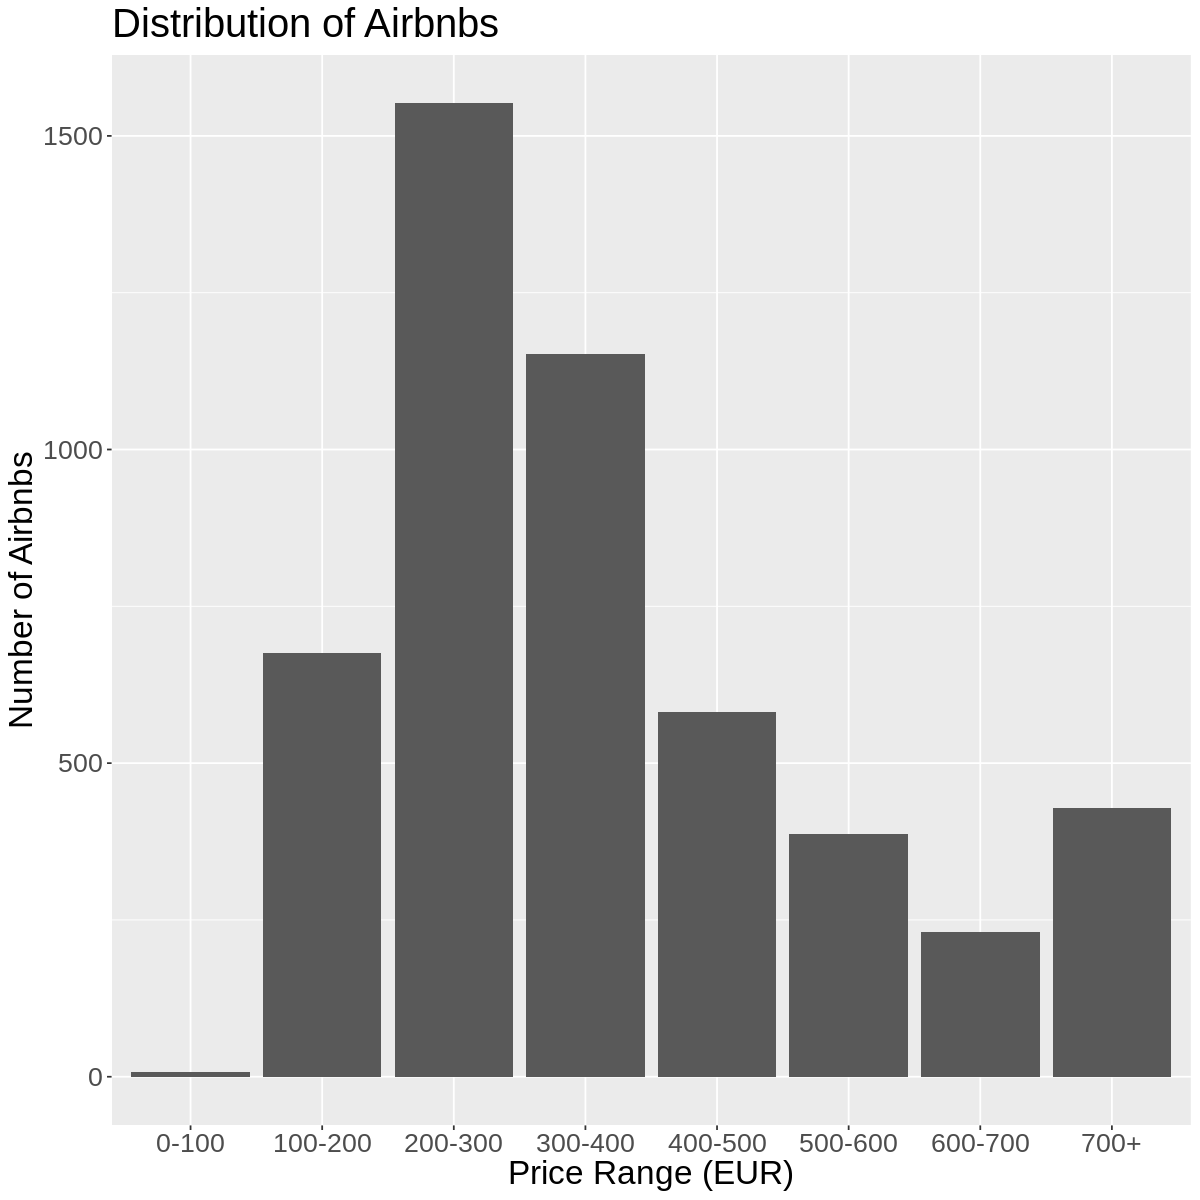

In [8]:
options(repr.plot.width = 10, repr.plot.height = 10)

# define the breakpoints for the realSum column
breaks <- c(0, 100, 200, 300, 400, 500, 600, 700, Inf)

# create a new column with the ranges
paris_train$realSumRange <- cut(paris_train$realSum, breaks = breaks, include.lowest = TRUE)

# plotting the distribution of Airbnbs throught Paris, based on the price range
# create a histogram with ggplot2
paris_graph_freq <- ggplot(paris_train, aes(x = realSumRange)) +
    geom_bar() +
    labs(x = "Price Range (EUR)", y = "Number of Airbnbs") + 
    ggtitle("Distribution of Airbnbs") +
    theme(text = element_text(size = 20)) +
    scale_x_discrete(labels = c("0-100", "100-200", "200-300", "300-400", "400-500", "500-600", "600-700", "700+"))
paris_graph_freq

The plot above shows that the `realSum` variable is (somewhat) normally distributed, with a peak at the price range of 200-300 EUR. Most of the Airbnbs are priced above 100 EUR and with the highest above 700 EUR. 


The second plot compares the distribution of the potential predictor variables. The data is normalized with `scale()` and plotted as histograms (an appropriate visual comparison) with `facet_wrap()`. Outliers are removed to improve the visualization.

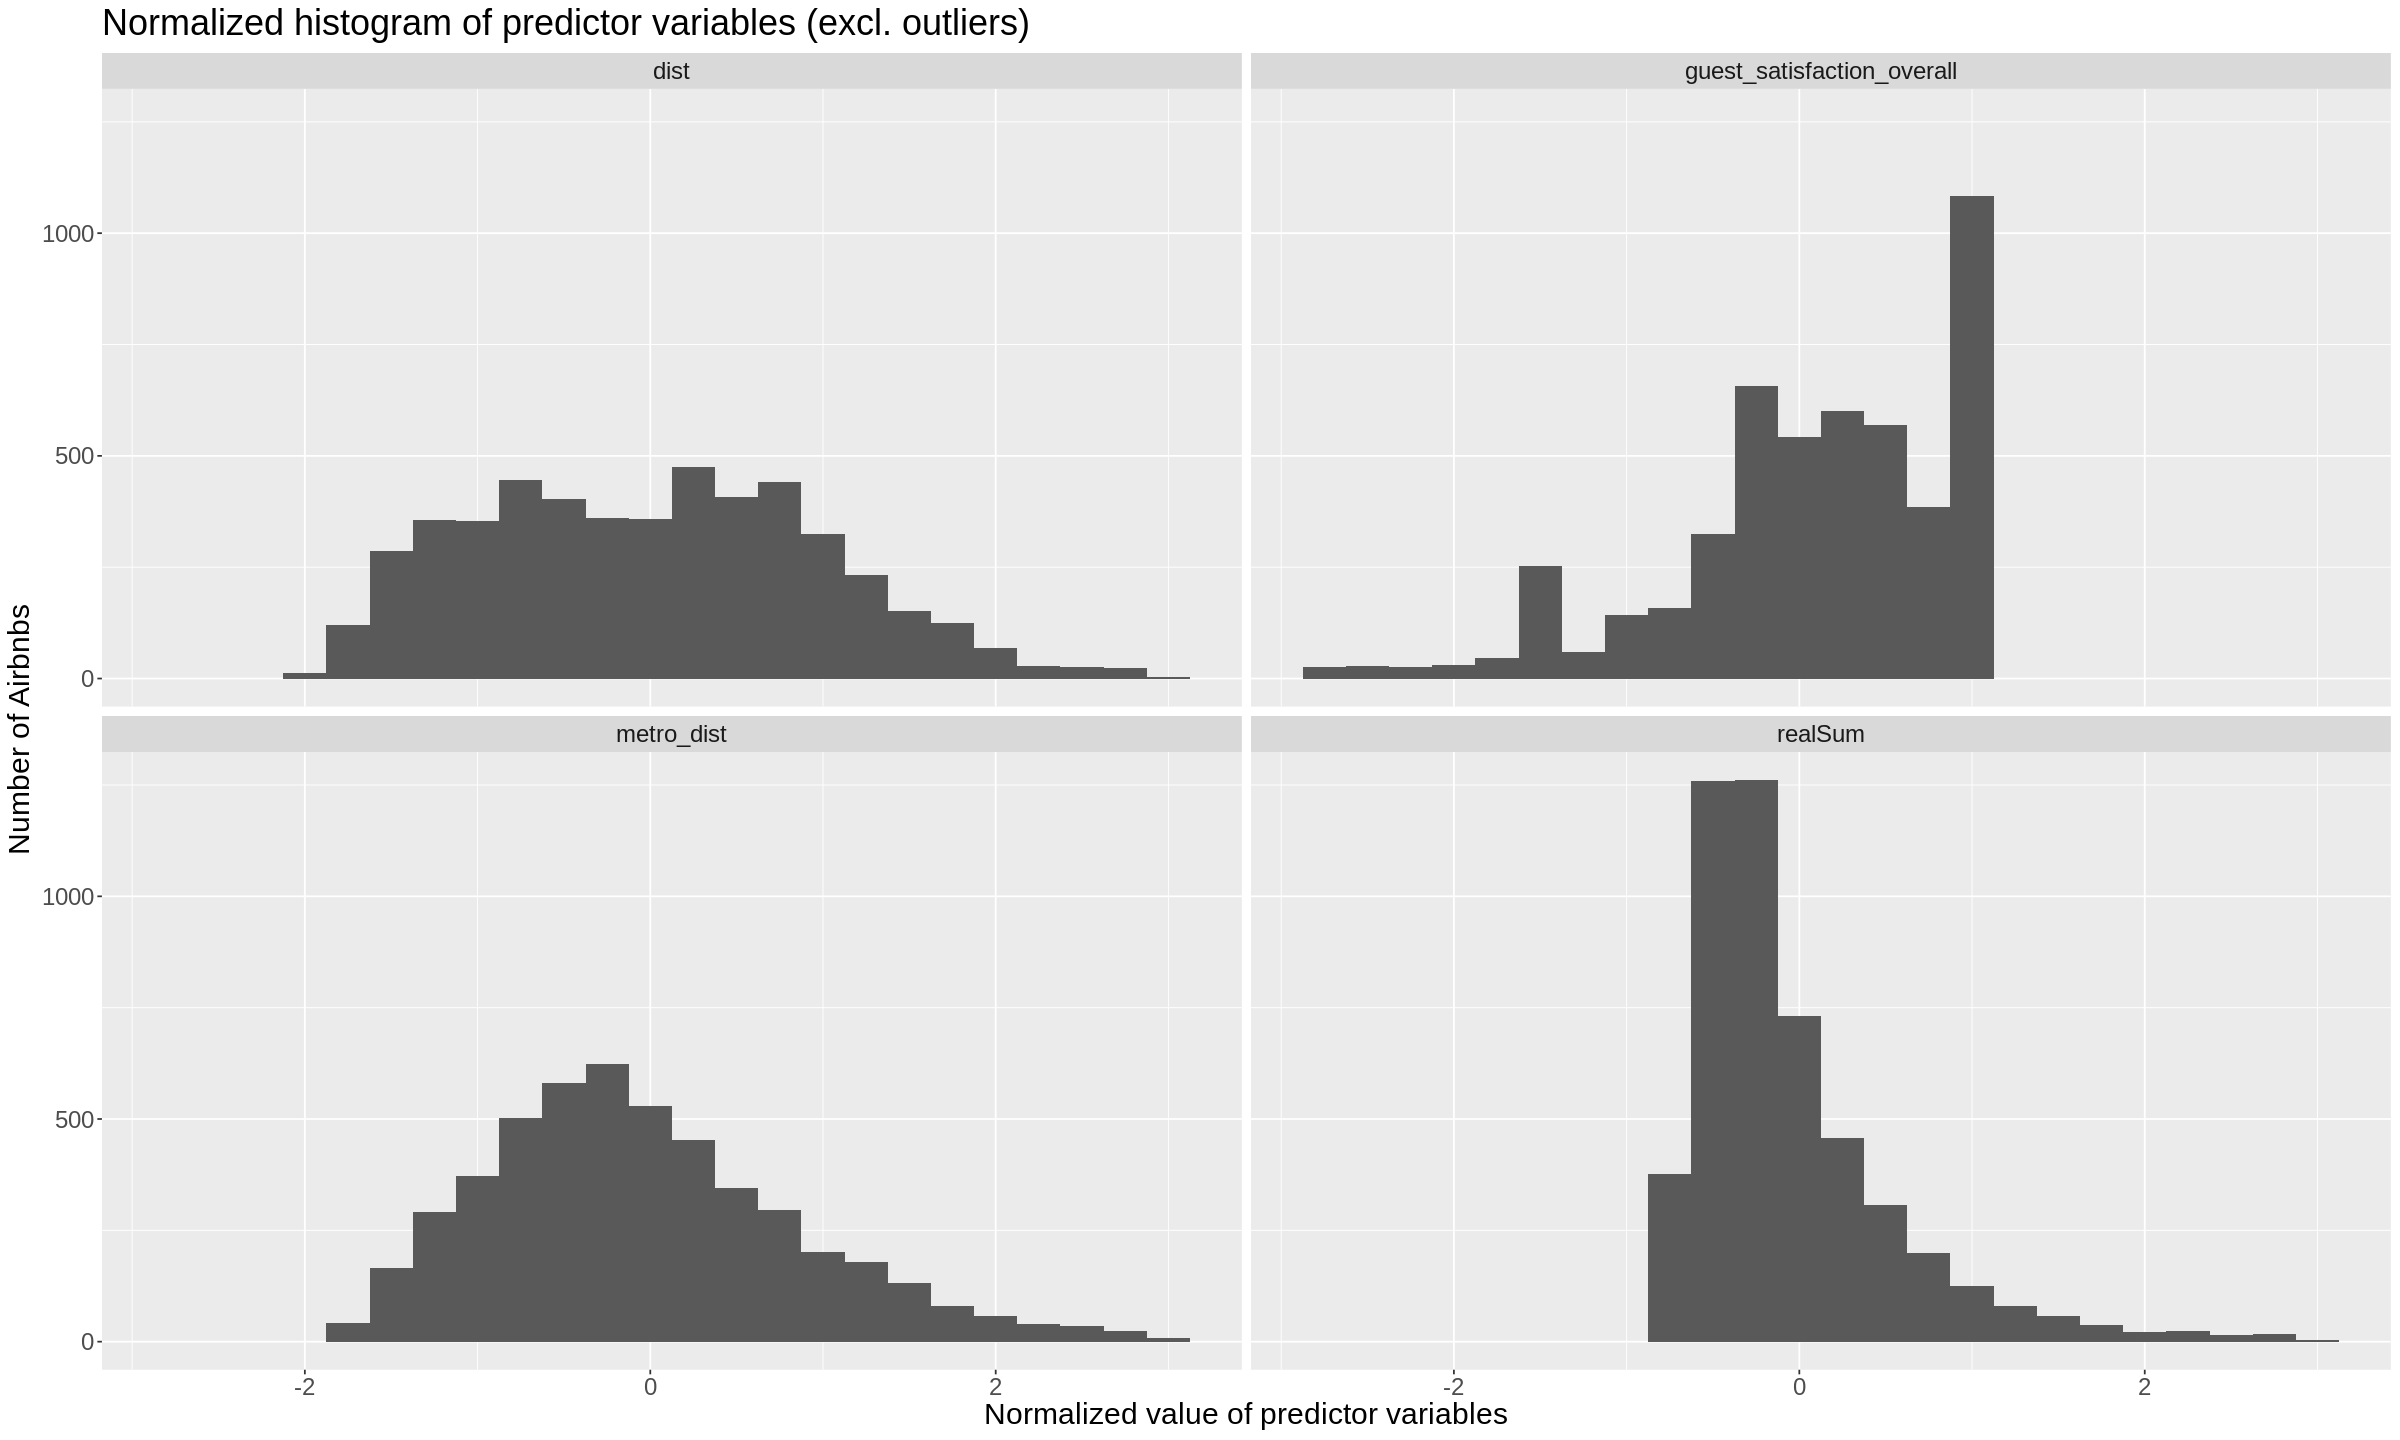

In [9]:
options(repr.plot.width = 20, repr.plot.height = 12)

#normalize the data with respect to each predictor variable
paris_train_normalized <- paris_train |>
  select(realSum, guest_satisfaction_overall, dist, metro_dist) |>
  scale() |>
  as.data.frame()

paris_train_longer <- pivot_longer(paris_train_normalized, cols = realSum:metro_dist, names_to = "variable", values_to = "value")

# define binwidth constant
PREDICTOR_BINWIDTH <- 0.25

# code to plot without excluding outliers
# paris_predictor_histogram <- ggplot(paris_training_normalized_longer, aes(x = value)) + 
#     geom_histogram(binwidth = PREDICTOR_BINWIDTH) +
#     facet_grid(rows = vars(variable)) +
#     ggtitle("Normalized histogram of predictor variables") +
#     labs(x = "Normalized value of predictor variables", y = "Number of Airbnbs") + 
#     theme(text = element_text(size = 18))

# remove outliers that are outside of 3 standard deviations
paris_train_normalized_longer_eo <- filter(paris_train_longer, value < 3 & value > -3)

paris_predictor_histogram_eo <- ggplot(paris_train_normalized_longer_eo, aes(x = value)) + 
    geom_histogram(binwidth = PREDICTOR_BINWIDTH) +
    facet_wrap(vars(variable)) +
    ggtitle("Normalized histogram of predictor variables (excl. outliers)") +
    labs(x = "Normalized value of predictor variables", y = "Number of Airbnbs") + 
    theme(text = element_text(size = 18))

paris_predictor_histogram_eo

To determine the shape of a histogram, you need to examine the distribution. A skewed left histogram has a long tail on the left side, while a skewed right histogram has a long tail on the right side. A unimodal histogram has one clear peak, while a bimodal histogram has two distinct peaks. 
The distance histogram (dist) is a bimodal distribution with two peaks at approximately x =  -1 and 1 normalized values. 
The distance from the nearest metro station (metro_dist) is a slight right-skewed distribution with a unimodal at x=0 normalized value. 
The guest satisfaction histogram is (guest_satisfaction_overall) is skewed to the left, with a unimodal peak at approximately x = 1 normalized values. 
The distribution for the total price of the Airbnb listing (realSum) is skewed to the right. 


The third plot involves `ggpairs()` from the `GGally` extension of `ggplot2`. It will create a scatter plot matrix with correlation coefficients that allows visualizations of relationships between predictor variables. For this visualization, `realSumRange` is removed from the dataset as it is not relevant to the analysis being performed here, it was already explored in a separate analysis above.

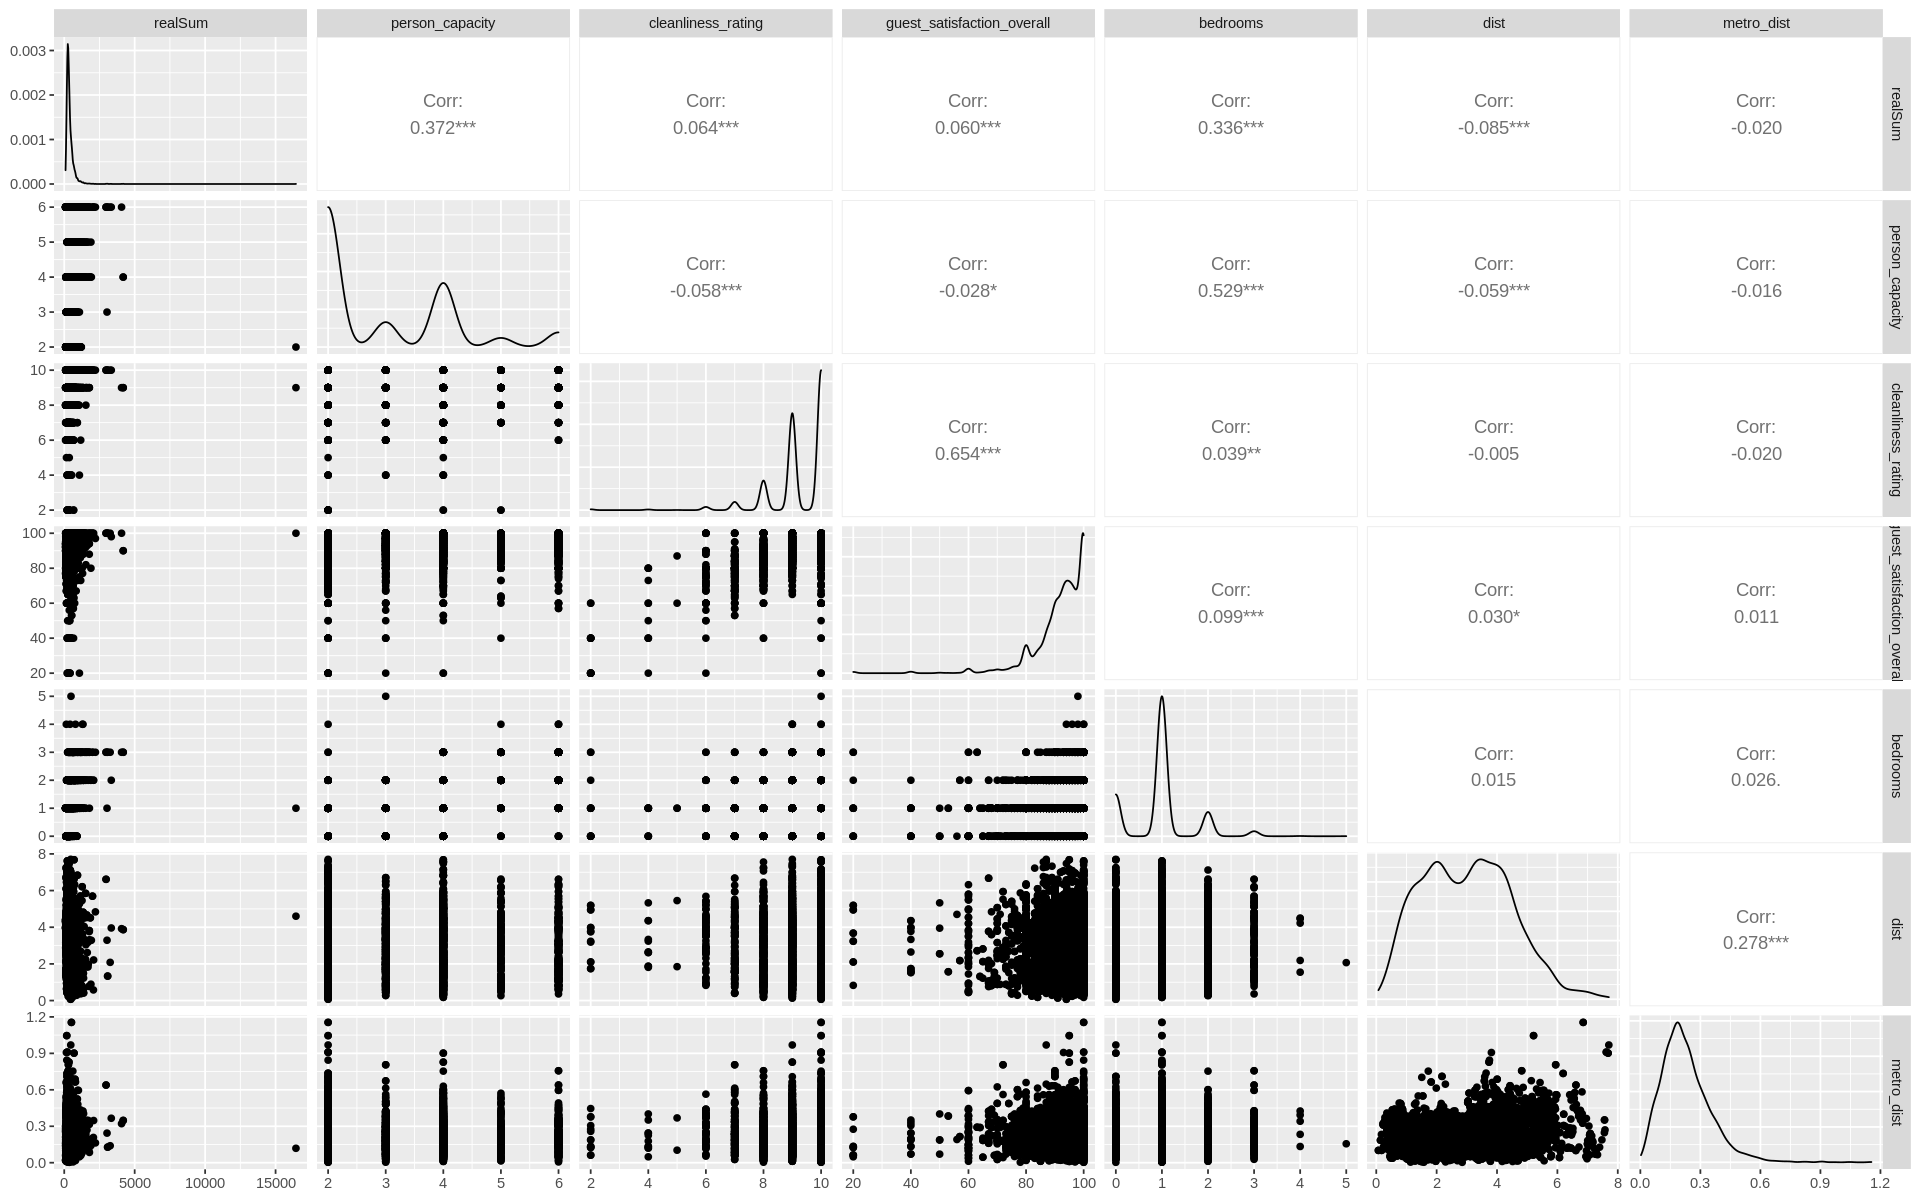

In [10]:
options(repr.plot.width = 16, repr.plot.height = 10)
paris_train |>
  select(-realSumRange) |>
  ggpairs()


From the plot above, the correlation coefficient between variables can be seen along with the scatterplot.

Below is an example scatter plot to explore the two predictor variables that have relatively highest correlation with each other. In the first plot, distance from the city center vs. listing price is used for axes, and the `realSumRange` variable as the color. The data used in this scatter plot is not normalized.

#### Possible Scatterplot Results ####

The relationship between two variables in a scatter plot can be visualized based on the pattern of points on the plot. There are several possible results, including: 


When there is no relationship, the points are scattered randomly without any pattern or trend, and the correlation coefficient is close to zero.


In a positive linear relationship, the points on the plot form a pattern that slopes upward from left to right, indicating that as one variable increases, the other variable also tends to increase. The correlation coefficient for a positive linear relationship is positive, indicating a strong positive association.


In contrast, a negative linear relationship is indicated by a pattern of points that slopes downward from left to right, indicating that a variable tends to decrease as another variable increases. The correlation coefficient for a negative linear relationship is negative, indicating a strong negative association.


A non-linear relationship indicates that the two variables are not in a straight line, but their relationship may be exponential, logarithmic and others. Clusters can also be identified in a scatterplot when data points form distinct groups or clusters, which indicate a potential for subpopulation within the dataset. 


Warning message:
“Removed 16 rows containing missing values (geom_point).”


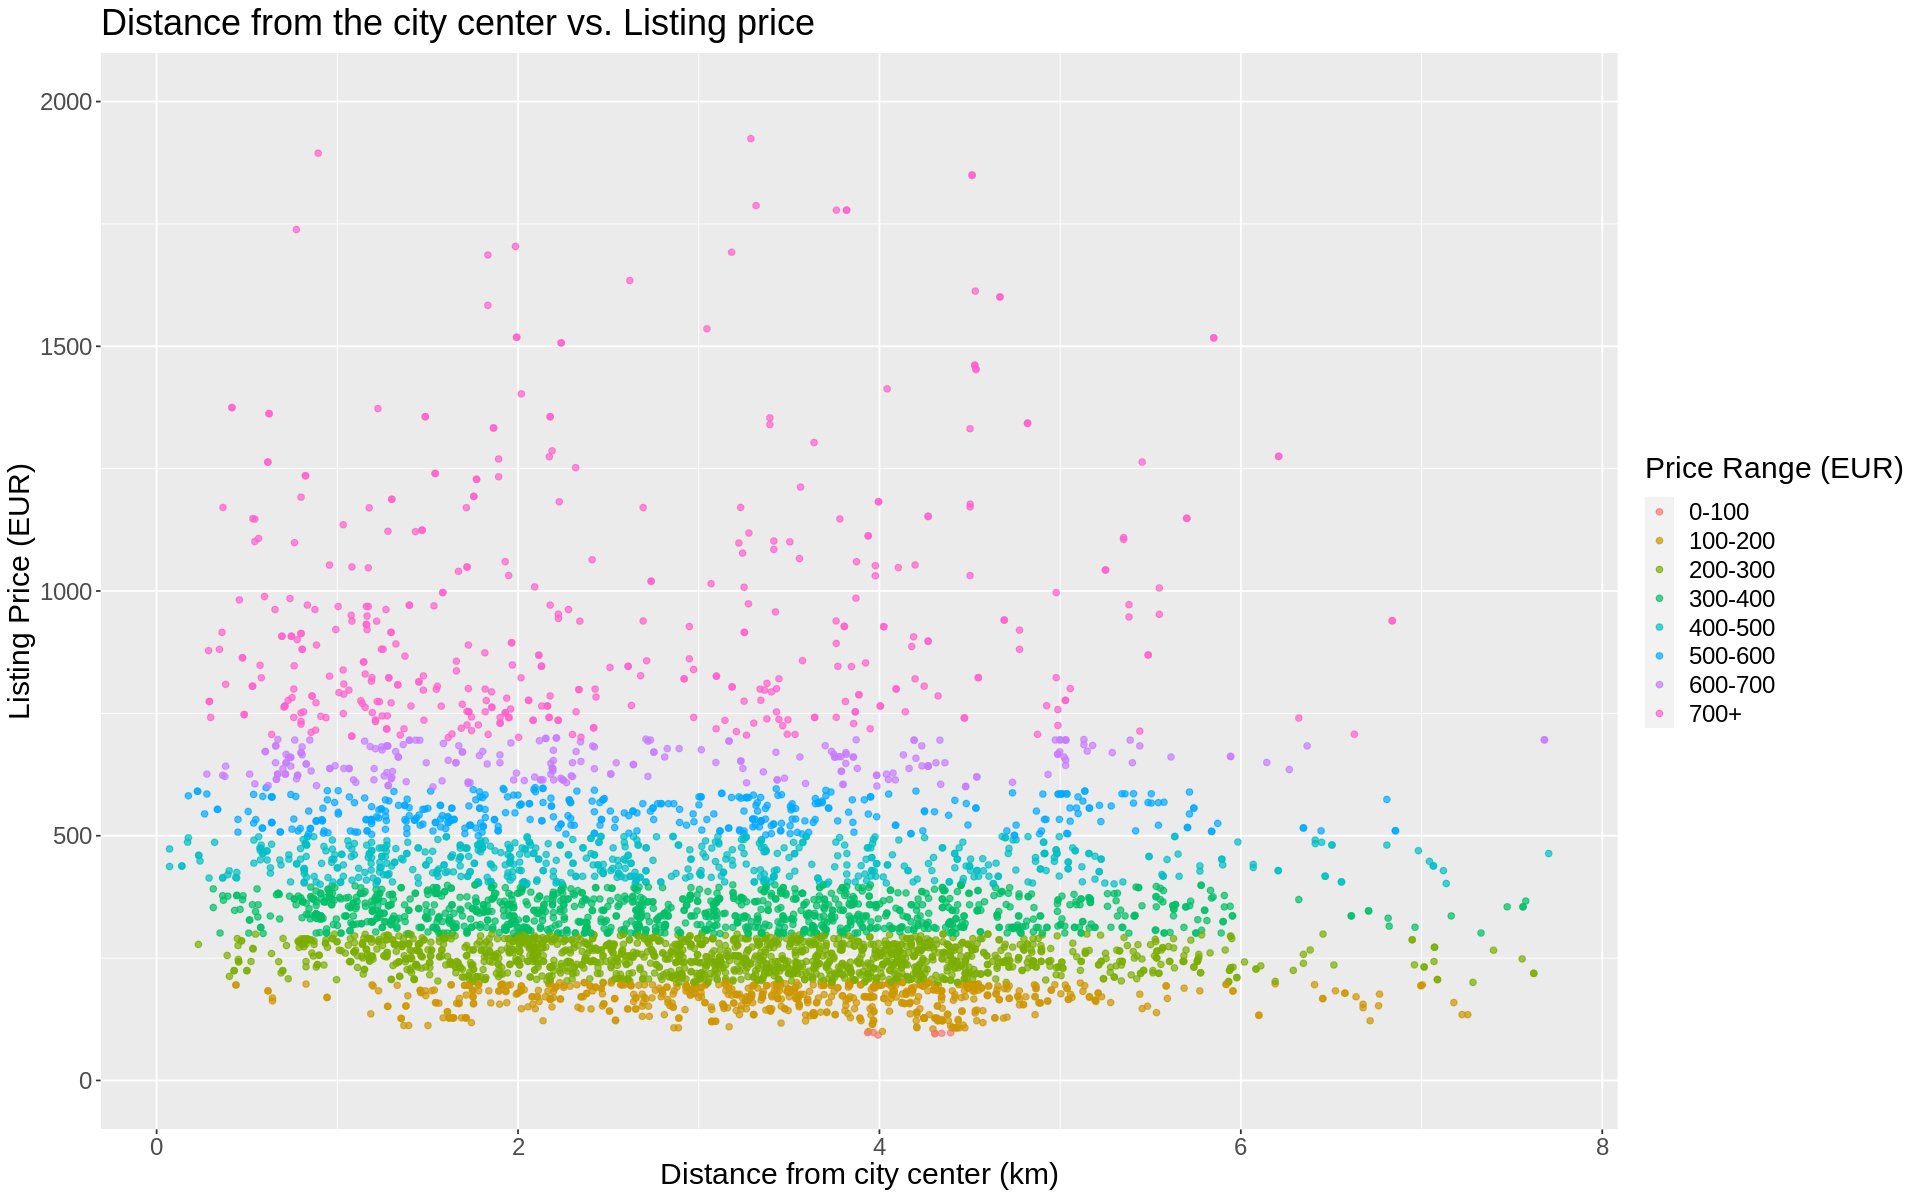

In [11]:
options(repr.plot.width = 16, repr.plot.height = 10)

ggplot(paris_train, aes(x = dist, y = realSum, color = cut(realSum, breaks = c(0,100,200,300,400,500,600,700, Inf), 
                                                           labels = c("0-100", "100-200", "200-300", "300-400", "400-500", "500-600", "600-700", "700+")))) +
  geom_point(alpha = 0.7) +
  ggtitle("Distance from the city center vs. Listing price") +
  labs(x = "Distance from city center (km)", y = "Listing Price (EUR)", color = "Price Range (EUR)") + 
  theme(text = element_text(size = 18)) +
  ylim(0, 2000)

The scatterplot shows that there is no relationship between the distance from the city center and the listing price, as the points are randomly scattered across the plot without any discernible pattern. The listing price for Airbnbs with different distances from the city center is mostly less than 1500 EUR. They appear to be concentrated at the plot's bottom (center) region, but there is no clear linear or nonlinear association between the variables. 

The next scatter plot explores the relationship between two predictor variables, the distance from the city center and the listing price, while also using the realSumRange variable to indicate the color. The data used in this scatter plot is not normalized.

Warning message:
“Removed 11 rows containing missing values (geom_point).”


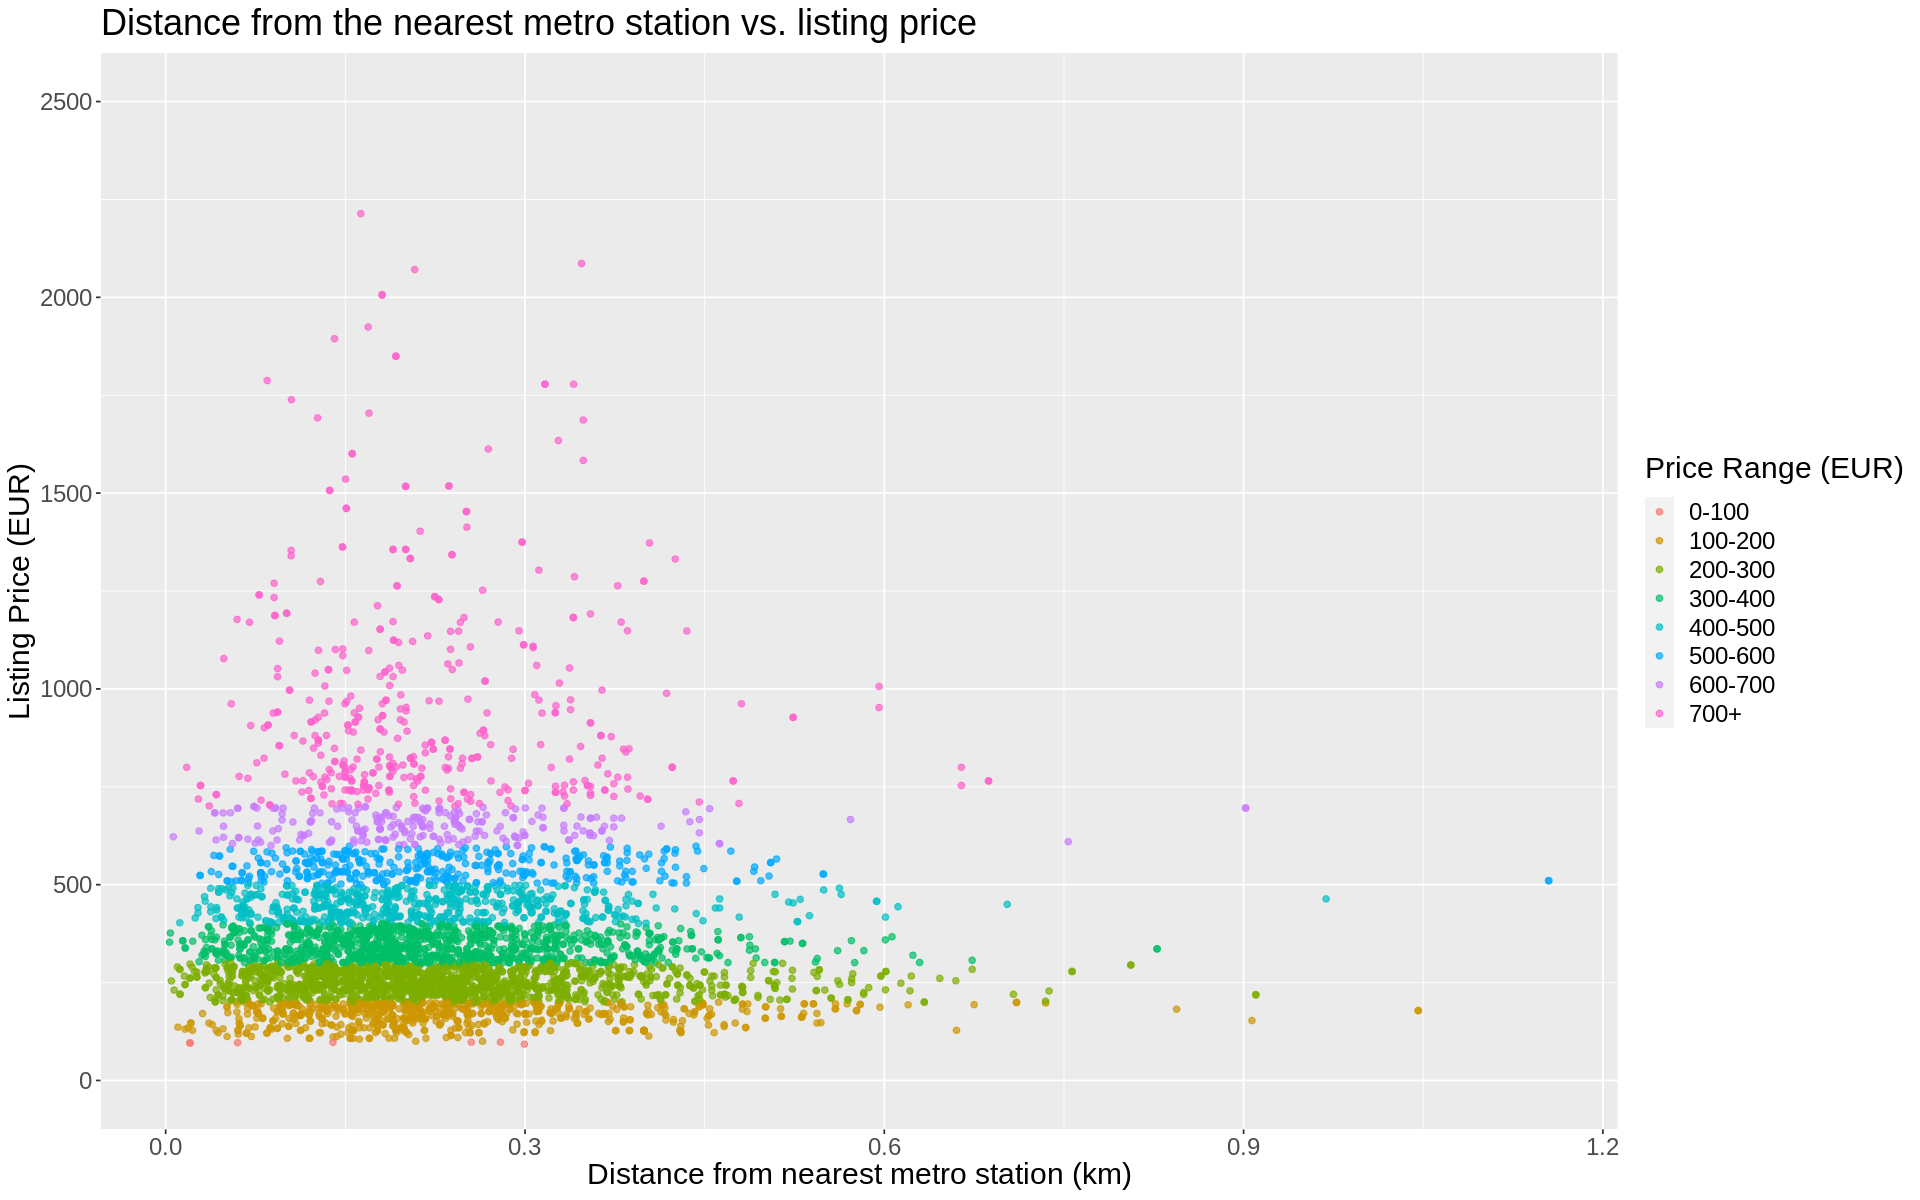

In [12]:
options(repr.plot.width = 16, repr.plot.height = 10)

ggplot(paris_train, aes(x = metro_dist, y = realSum, color = cut(realSum, breaks = c(0,100,200,300,400,500,600,700, Inf), 
                                                                 labels = c("0-100", "100-200", "200-300", "300-400", "400-500", "500-600", "600-700", "700+")))) +
  geom_point(alpha = 0.7) +
  ggtitle("Distance from the nearest metro station vs. listing price") +
  labs(x = "Distance from nearest metro station (km)", y = "Listing Price (EUR)", color = "Price Range (EUR)") + 
  theme(text = element_text(size = 18)) +
  ylim(0, 2500)

Similarly to the last scatter plot, this example shows no relationship between the two variables (i.e., listing price and distance from the nearest metro station). The data points are concentrated at the bottom left of the graph and are scattered randomly. There is no clear pattern or trend in the data points; specifically, the change in one variable does not appear to be related to changes in the other variable. Therefore, there is no relationship between the distance from the nearest metro station and the listing price. 

The next scatter plots further explore the relationship between the `dist`, `metro_dist`, and `guest_satisfaction_overall` variables. The data used in these scatter plots are not normalized. The first scatter plot compares the distance from the city center with the Guest Satisfaction ratings. 

Warning message:
“Removed 11 rows containing missing values (geom_point).”


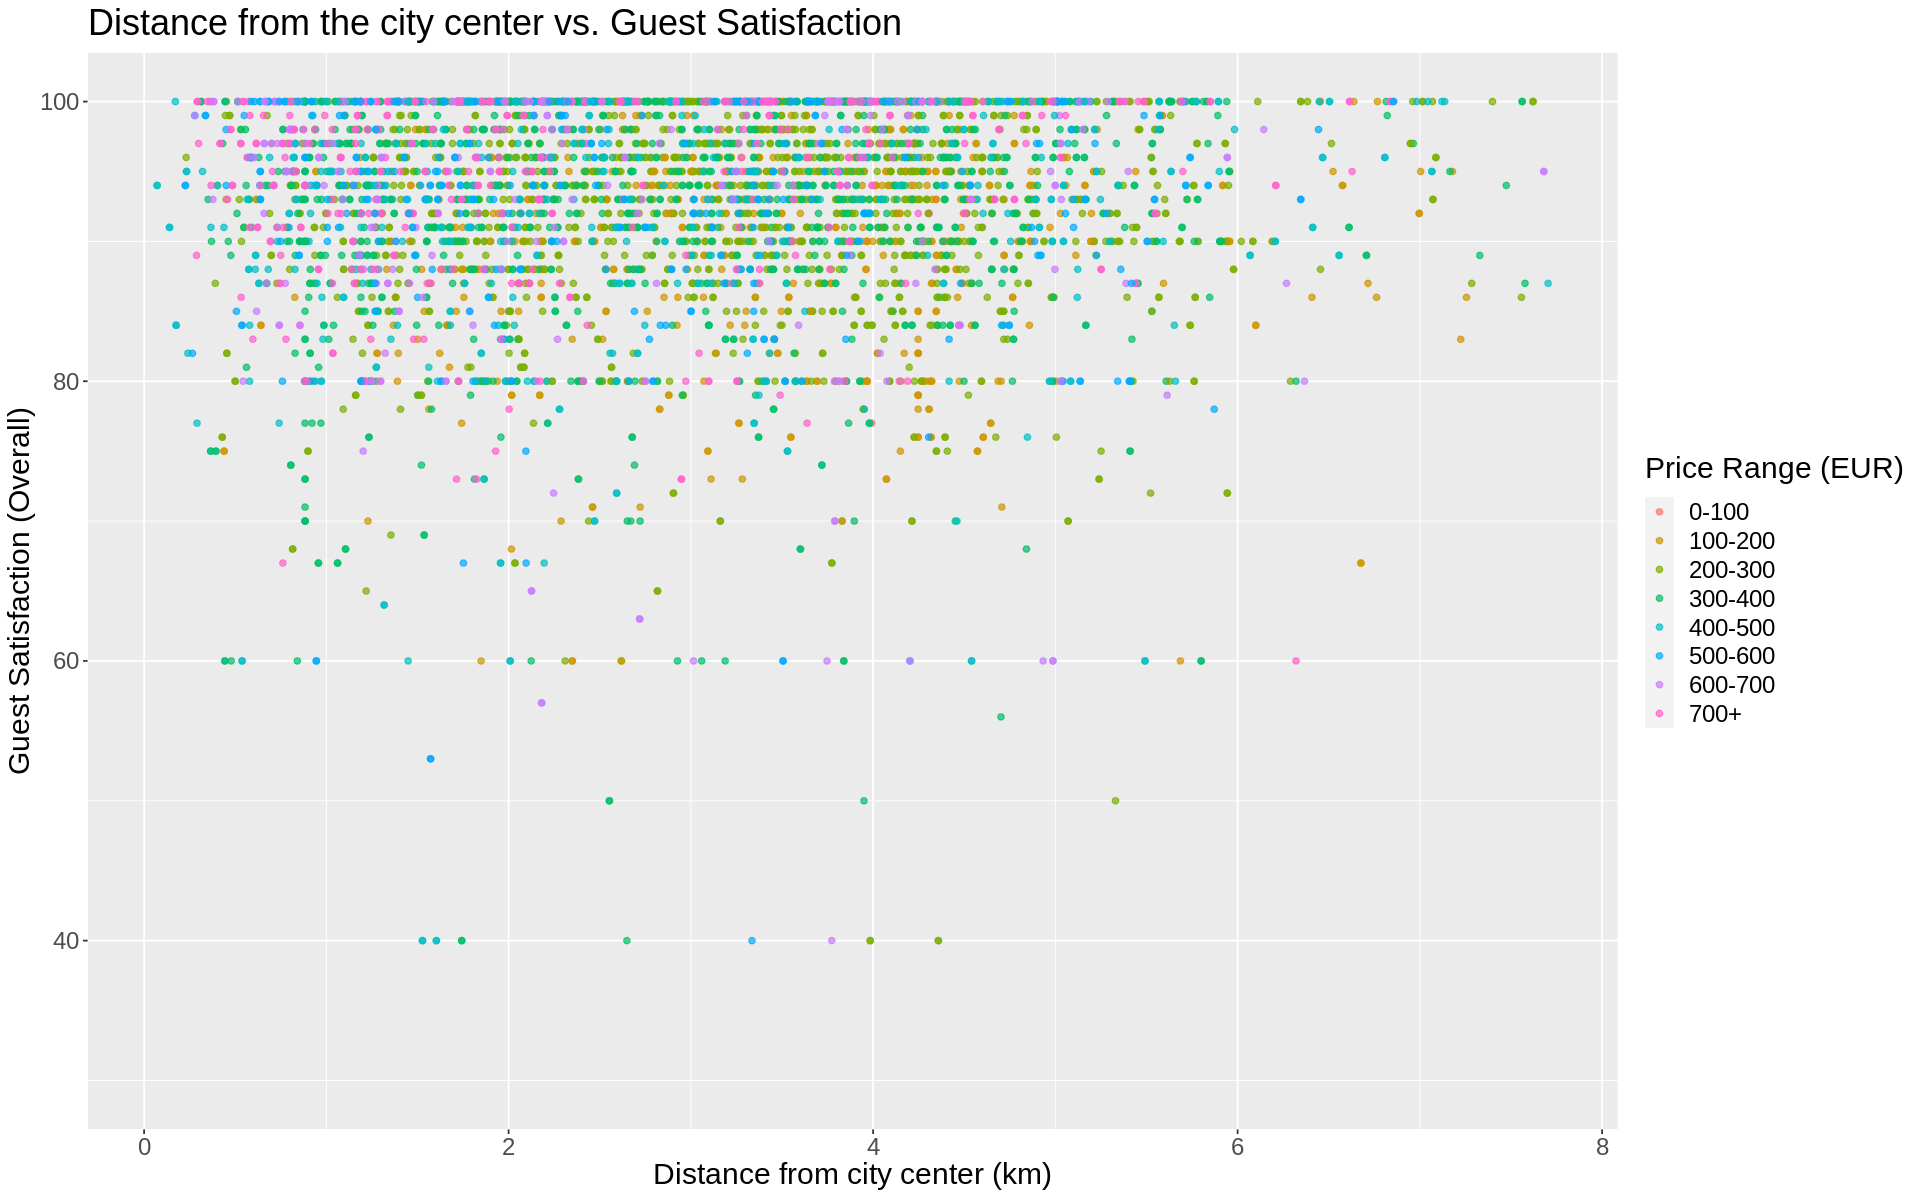

In [13]:
options(repr.plot.width = 16, repr.plot.height = 10)

ggplot(paris_train, aes(x = dist, y = guest_satisfaction_overall, color = cut(realSum, breaks = c(0,100,200,300,400,500,600,700, Inf), 
                                                                 labels = c("0-100", "100-200", "200-300", "300-400", "400-500", "500-600", "600-700", "700+")))) +
  geom_point(alpha = 0.7) +
  ggtitle("Distance from the city center vs. Guest Satisfaction") +
  labs(x = "Distance from city center (km)", y = "Guest Satisfaction (Overall)", color = "Price Range (EUR)") + 
  theme(text = element_text(size = 18)) +
  ylim(30, 100)

This example displays no relationship between distance from the city center and guest satisfaction, for the points are concentrated at the top of the graph without a clear pattern or direction. The changes in one variable do not appear to be associated with changes in the other variable.

The next scatter plot compares the distance from the nearest metro station with the Guest Satisfaction ratings. 

Warning message:
“Removed 11 rows containing missing values (geom_point).”


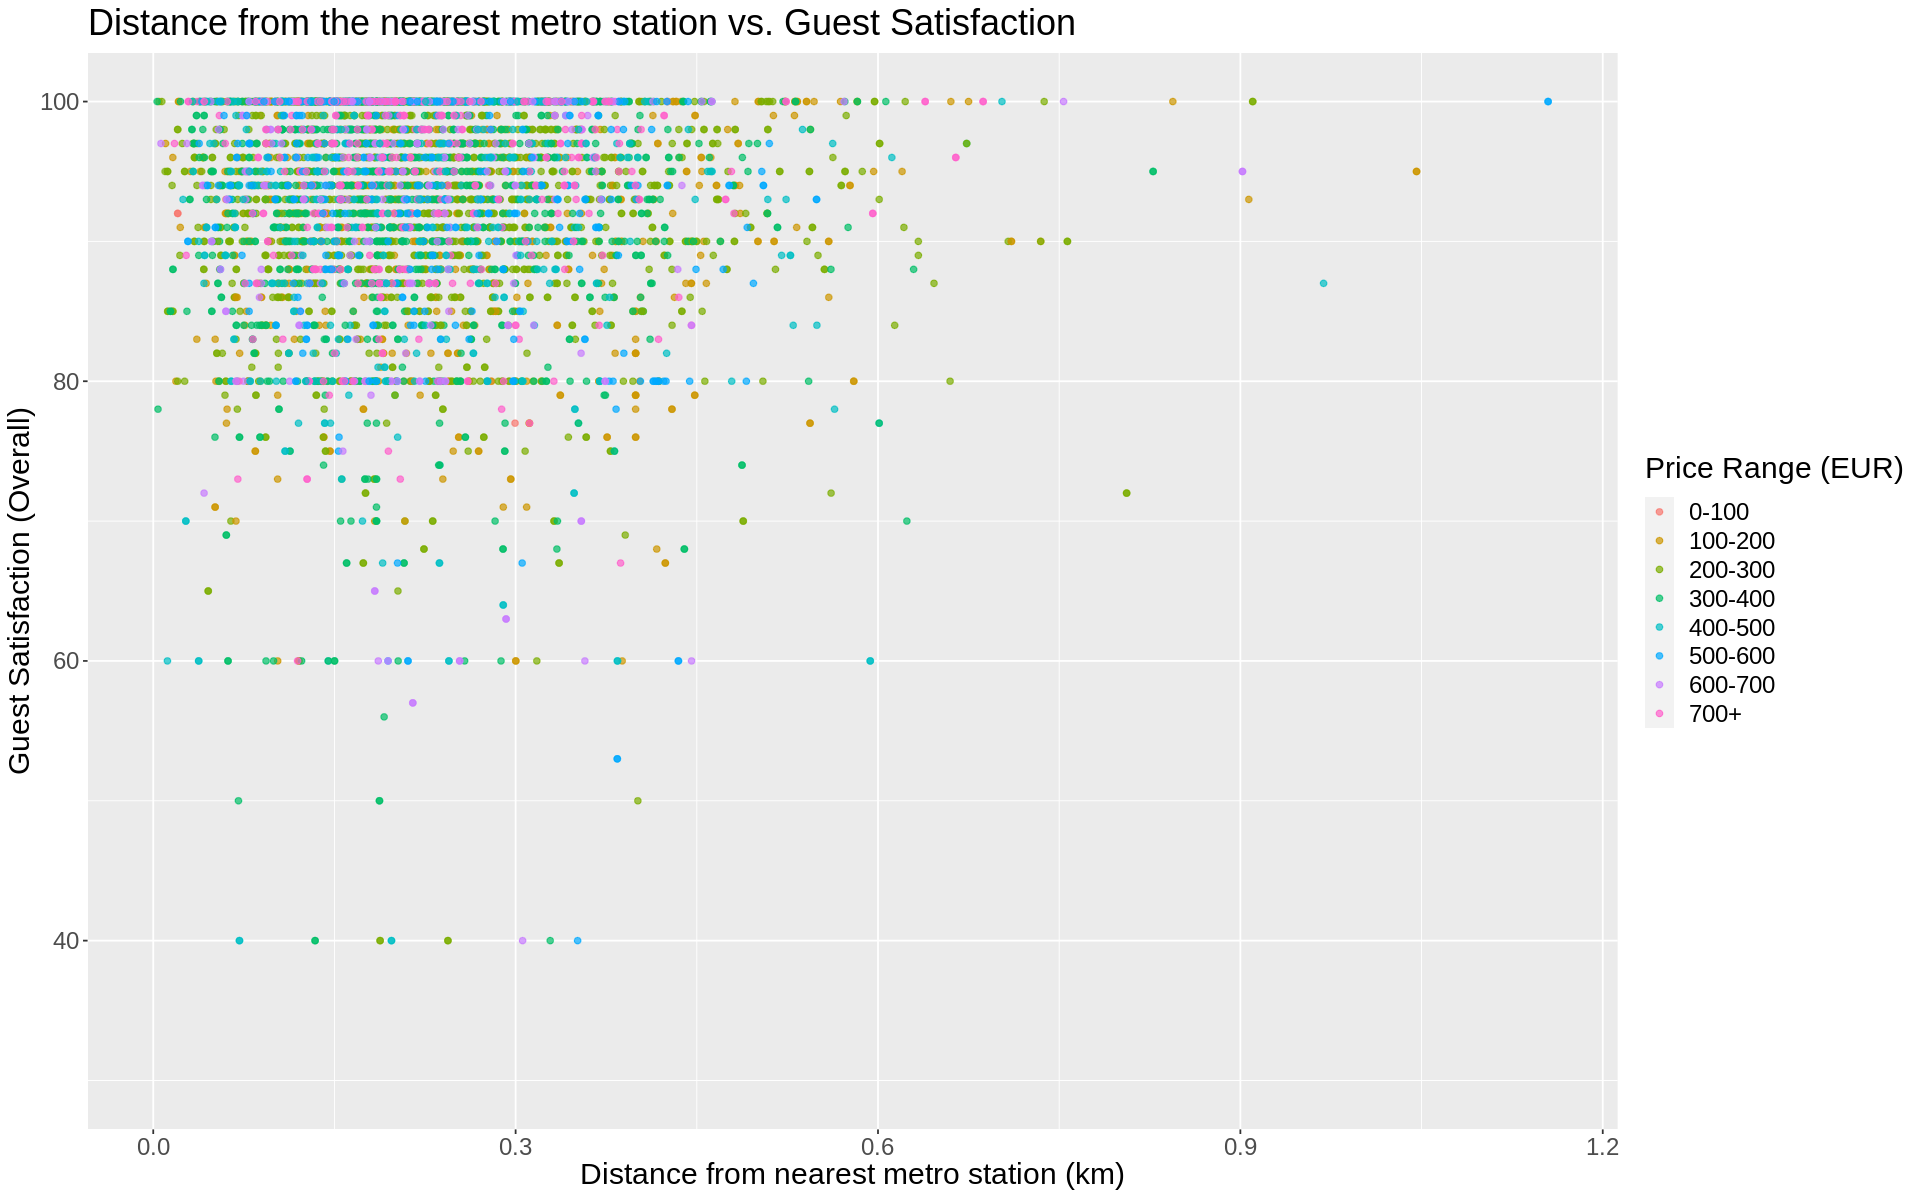

In [14]:
options(repr.plot.width = 16, repr.plot.height = 10)

ggplot(paris_train, aes(x = metro_dist, y = guest_satisfaction_overall, color = cut(realSum, breaks = c(0,100,200,300,400,500,600,700, Inf), 
                                                                 labels = c("0-100", "100-200", "200-300", "300-400", "400-500", "500-600", "600-700", "700+")))) +
  geom_point(alpha = 0.7) +
  ggtitle("Distance from the nearest metro station vs. Guest Satisfaction") +
  labs(x = "Distance from nearest metro station (km)", y = "Guest Satisfaction (Overall)", color = "Price Range (EUR)") + 
  theme(text = element_text(size = 18)) +
  ylim(30, 100)

This scatterplot shows no relationship between the two variables' distance from the city center and guest satisfaction. No relationship can be concluded as the points are concentrated at the top of the graph without a clear pattern, direction or shape. This lack of a linear relationship shows that distance from the nearest metro station and guest satisfaction do not affect each other, meaning the values of one variable cannot be predicted or explained by the values of the other variable, and vice versa. The change in one variable also does not affect the other variable. 

In [15]:
paris_subset <- paris_train |> 
  select(realSum,
         person_capacity,
         cleanliness_rating,
         guest_satisfaction_overall,
         bedrooms,
         dist,
         metro_dist)

names <- colnames(paris_subset |> select(-realSum))

paris_subset

,realSum,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
4,211.3431,2,10,94,1,3.3023186,0.2347397
11,207.1488,2,10,95,1,1.4252839,0.2073954
31,169.6337,2,10,95,0,0.9431802,0.3667330
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6555,927.1600,4,7,95,1,3.805704,0.1609019
6645,4184.6864,4,9,90,3,3.869385,0.3478899
6659,556.2028,6,10,91,3,2.746718,0.3665201


In [16]:
# create an empty tibble to store the results
# accuracies <- tibble(size = integer(), 
#                      model_string = character(), 
#                      accuracy = numeric())

# convert the outcome variable to a factor
# paris_subset <- paris_subset |> 
#                    mutate(realSum = as_factor(realSum))

# create a model specification
# knn_spec <- nearest_neighbor(weight_func = "rectangular", 
     #                         neighbors = tune()) |>
     # set_engine("kknn") |>
     # set_mode("classification")

# create a 5-fold cross-validation object
# paris_vfold <- vfold_cv(paris_subset, v = 5, strata = realSum) 
    #Warning message:
    # “Too little data to stratify.
    # • Resampling will be unstratified.”

# store the total number of predictors
# n_total <- length(names)

# stores selected predictors
# selected <- c()

# for every size from 1 to the total number of predictors
# for (i in 1:n_total) {
    # for every predictor still not added yet
#     accs <- list()
#     models <- list()
#     for (j in 1:length(names)) {
    
#         # create a model string for this combination of predictors
#         preds_new <- c(selected, names[[j]])
#         model_string <- paste("realSum", "~", paste(preds_new, collapse="+"))

#         # create a recipe from the model string
#         paris_recipe <- recipe(as.formula(model_string), 
#                                 data = paris_subset) |>
#                           step_scale(all_predictors()) |>
#                           step_center(all_predictors())

#         # tune the KNN classifier with these predictors, 
#         # and collect the accuracy for the best K
#         acc <- workflow() |>
#           add_recipe(paris_recipe) |>
#           add_model(knn_spec) |>
#           tune_grid(resamples = paris_vfold, grid = 10) |>
#           collect_metrics() |>
#           filter(.metric == "accuracy") |>
#           summarize(mx = max(mean))
#         acc <- acc$mx |> unlist()

#         # add this result to the dataframe
#         accs[[j]] <- acc
#         models[[j]] <- model_string
#     }
#     jstar <- which.max(unlist(accs))
#     accuracies <- accuracies |> 
#       add_row(size = i, 
#               model_string = models[[jstar]], 
#               accuracy = accs[[jstar]])
#     selected <- c(selected, names[[jstar]])
#     names <- names[-jstar]
# }
# accuracies

# print(names)

## Data Analysis

##### Data analysis will include:
- Start with a model having no predictors.
- For each unused predictor, add it to the model to form a candidate model.
- Tune all of the candidate models.
- Update the model to be the candidate model with the highest cross-validation accuracy.
- Select the model that provides the best trade-off between accuracy and simplicity.

In [17]:


# Create a data frame with the predictors to include in the model
# predictors <- c("guest_satisfaction_overall", "dist", "metro_dist")

# Create a formula with the response variable and the initial set of predictors
# formula <- formula(paste("realSum ~", paste(predictors, collapse = "+")))

# Perform forward selection using the leaps package
# fit <- regsubsets(formula, data = paris_train, nvmax = length(predictors), method = "forward")

# Print the summary of the fit
# summary(fit)

# Get the best model based on adjusted R-squared
# best_model <- which.max(summary(fit)$adjr2)
# names(coef(fit, id = best_model))

The output shows that the algorithm identified 3 variables (guest_satisfaction_overall, dist, and metro_dist) as the best predictors to include in the model. The first column labeled "Forced in" indicates whether the variable was required to be included in the model. The second column labeled "Forced out" indicates whether the variable was not allowed to be included in the model.

The asterisks (*) in the output indicate which variables were selected for each subset. The first row shows an empty subset (only the intercept term is included), the second row shows the subset that includes only the variable "guest_satisfaction_overall" and the intercept term, the third row shows the subset that includes "guest_satisfaction_overall" and "dist" and the intercept term, and the fourth row shows the subset that includes all three variables (guest_satisfaction_overall, dist, and metro_dist) and the intercept term.

Finally, the last line of output shows the intercept term and the three selected predictor variables in the final model.

The next step would be to interpret the results and use them to inform further analysis or decision-making.

From the output you provided, it appears that the regsubsets function was used to perform forward stepwise regression on a set of predictors (guest_satisfaction_overall, dist, and metro_dist) to determine the best subset of variables to use in a linear regression model. The results show that the best model includes all three variables.

The table below the algorithm output shows the variables included in each of the three models generated by the algorithm, along with an asterisk (*) indicating which variables were selected. The final row shows the variables included in the best model, which includes all three variables.

The last line shows the coefficients of the variables in the final model: the intercept, guest_satisfaction_overall, dist, and metro_dist. These coefficients can be used to estimate the relationship between the predictor variables and the outcome variable of interest.

In [18]:
# define predictors
# predictors <- c("guest_satisfaction_overall", "dist", "metro_dist")

# perform subset selection using forward selection
# subset_model <- regsubsets(formula = realSum ~ ., data = paris_train[, predictors], nvmax = length(predictors), method = "forward")

# select the best model with 3 predictors
# best_model <- subset_model$which[3,]

# fit a linear regression model using the selected subset of variables
# final_model <- lm(realSum ~ ., data = paris_train[, c("price", names(best_model))])

In [19]:
# Create a data frame with the selected variables
# paris_train_selected <- paris_train |> 
#   select(realSum, person_capacity, cleanliness_rating, guest_satisfaction_overall, bedrooms, dist, metro_dist)

# Perform forward stepwise selection
# reg_fit <- regsubsets(realSum ~ ., data = paris_train_selected, nvmax = 15, method = "forward")

# Summarize the results
# summary(reg_fit)

#### Training Classification Model with K-NN
Next, we will construct a training classification model with K-NN to determine the best value of k (code blocks are split so that individual code blocks can be run and skip run time).

In [20]:
# create a formula with all variables
# full_formula <- formula(realSum ~ .)

# perform stepwise regression using AIC as the criterion
# model <- step(lm(full_formula, data = paris_train), direction = "both", k = log(nrow(paris_train)), trace = FALSE)

In [21]:
# predictors <- c("room_type", "room_shared", "room_private", "person_capacity", "host_is_superhost", 
#                 "multi", "biz", "cleanliness_rating", "guest_satisfaction_overall", "bedrooms", 
#                 "dist", "metro_dist", "lng", "lat")

# result <- regsubsets(price ~ ., data = paris_train[, predictors], nvmax = length(predictors), method = "forward")

# summary(result)

# Create a data frame of the model sizes and adjusted R-squared values
# rsq <- summary(result)$adjr2
# size <- seq_along(rsq)
# df <- data.frame(Size = size, Adjusted_R_Squared = rsq)

# Plot the adjusted R-squared values against the number of predictors
# ggplot(df, aes(x = Size, y = Adjusted_R_Squared)) +
#   geom_line() +
#   geom_point() +
#   xlab("Number of Predictors") +
#   ylab("Adjusted R-squared")

The above commented codes shows our initial intention to perform the Forward selection. Alternative method is explored after condisderation as problems arised. 

Instead, the RMSE plot and cross-validation is used to assess the relationship between Airbnb prices and distance from the city center or metro, as they are the only continuous variables in the data set. 

### Evaluate How Distance from City Center Affects the Airbnb Prices

In [32]:
#build a recipe and scale all data 
paris_recipe <- recipe(realSum ~ dist, data = paris_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

# create a 5-fold cross-validation object
paris_vfold <- vfold_cv(paris_train, v = 5, strata = realSum)


paris_wkflw <- workflow() |>
  add_recipe(paris_recipe) |>
  add_model(knn_spec)

paris_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [36]:
gridvals <- tibble(neighbors = seq(from = 1, to = 200))

paris_results <- paris_wkflw |>
  tune_grid(resamples = paris_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

# show the results
paris_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,432.5604,5,100.44192,Preprocessor1_Model001
2,rmse,standard,372.7584,5,58.57776,Preprocessor1_Model002
3,rmse,standard,354.4663,5,58.54796,Preprocessor1_Model003
⋮,⋮,⋮,⋮,⋮,⋮,⋮
198,rmse,standard,325.7780,5,62.56833,Preprocessor1_Model198
199,rmse,standard,325.7675,5,62.58154,Preprocessor1_Model199
200,rmse,standard,325.7890,5,62.57454,Preprocessor1_Model200


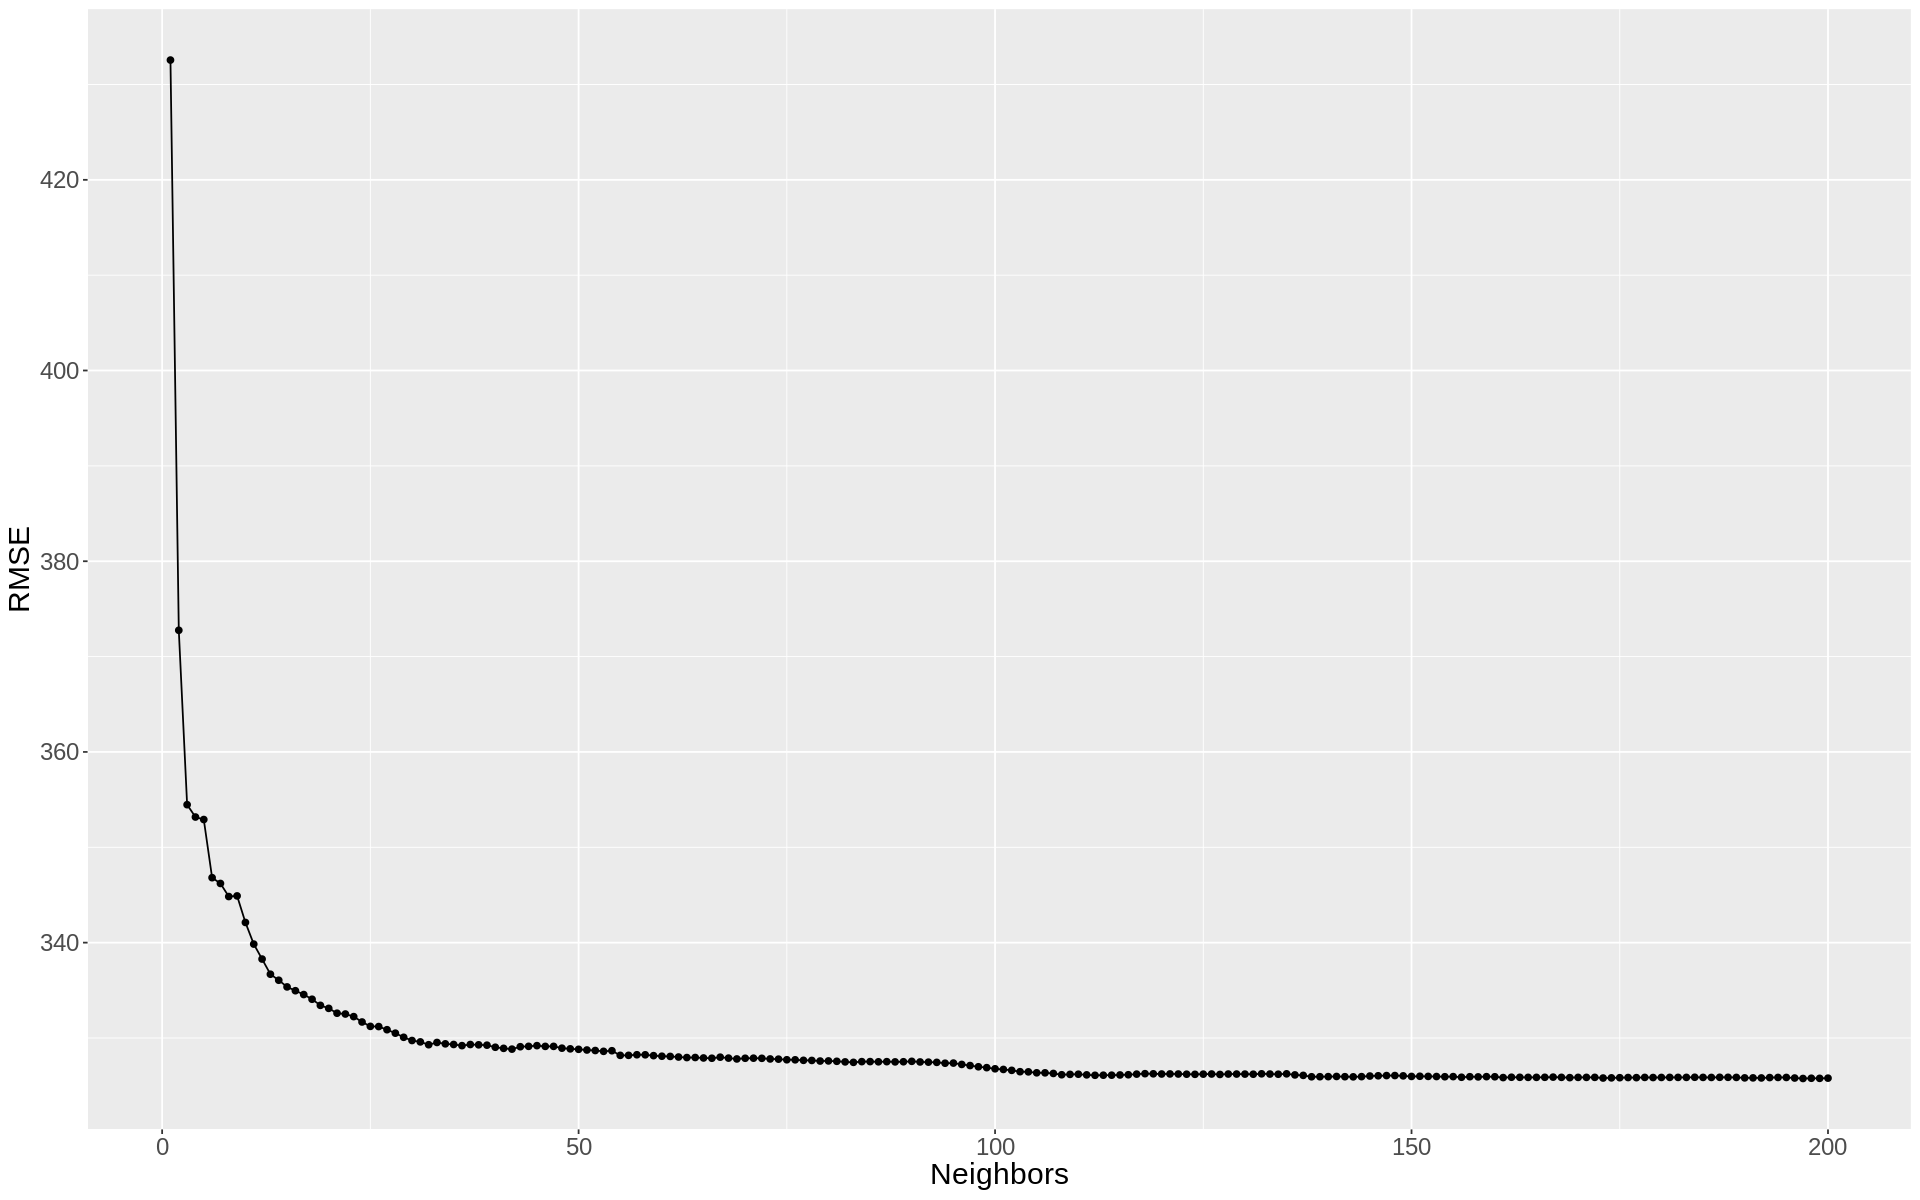

In [37]:
RMSPE_plot <- ggplot(paris_results, aes(x = neighbors, y = mean)) + 
    geom_line() +
    geom_point(alpha = 1.0) + #transparency
    xlab("Neighbors") +
    ylab("RMSE") +
    theme(text = element_text(size = 18)) 
RMSPE_plot

In [38]:
# show only the row of minimum RMSPE
paris_min <- paris_results |>
  filter(mean == min(mean))

paris_min 

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
197,rmse,standard,325.7523,5,62.56353,Preprocessor1_Model197


Based on the graph and the summary table, the smallest RMSE (for testing data) for dist (distance from the city centre) occurs when K = 197.  

## Evaluation on the Test Set 

In [39]:
kmin <- paris_min  |> 
    pull(neighbors)

paris_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) |>
  set_engine("kknn") |>
  set_mode("regression")

paris_fit <- workflow() |>
  add_recipe(paris_recipe) |>
  add_model(paris_spec) |>
  fit(data = paris_train)

paris_test_summary <- paris_fit |>
  predict(paris_test) |>
  bind_cols(paris_test) |>
  metrics(truth = realSum, estimate = .pred) |>
  filter(.metric == 'rmse')

paris_test_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,248.9917


The final model's test error as assessed by RMSPE 248.9917 EUR. Thus, one can expect the error 
in the prediction to be approximately 248.9917 EUR. 

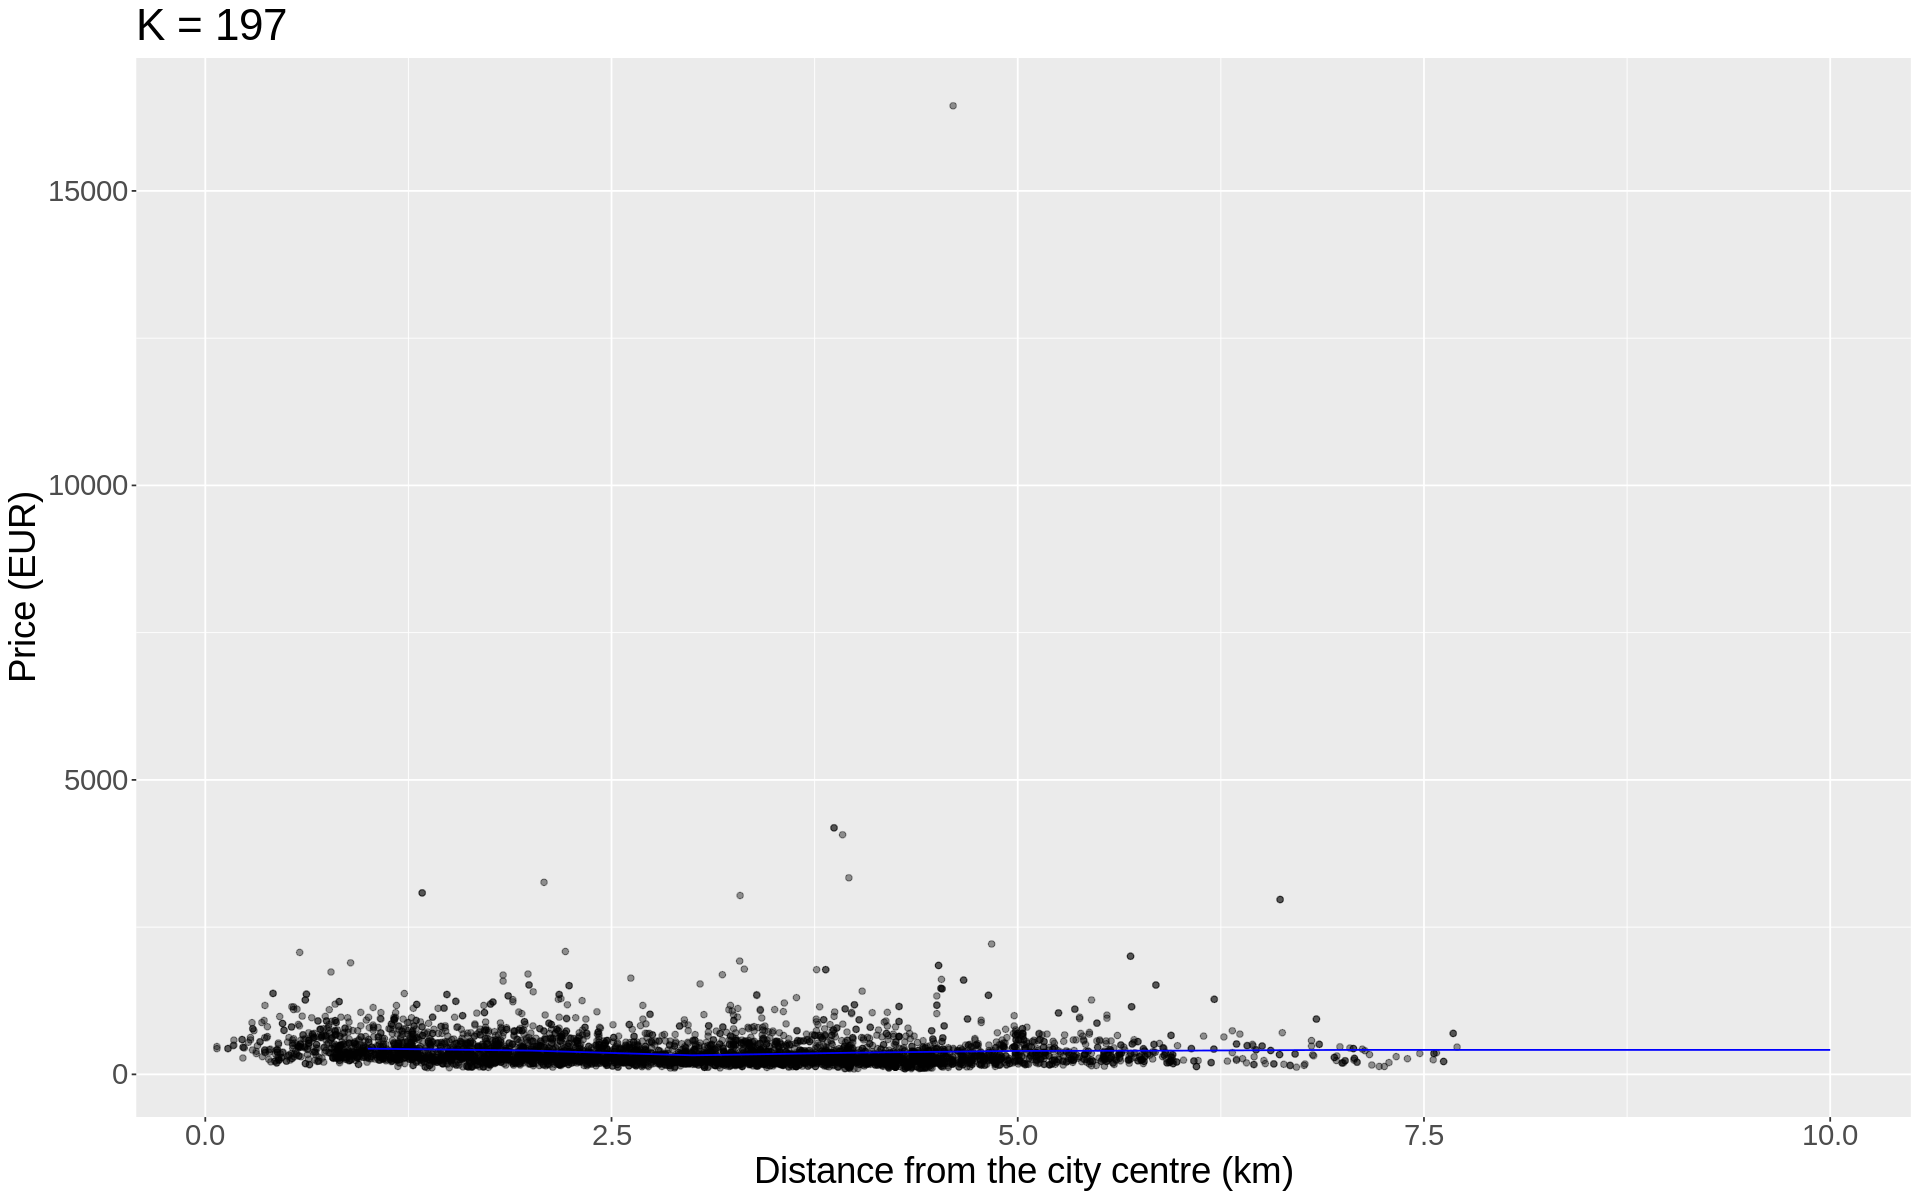

In [41]:
paris_preds <- tibble(dist = seq(from = 1, to = 10))

paris_preds  <- paris_fit |>
  predict(paris_preds) |>
  bind_cols(paris_preds)

plot_final <- ggplot(paris_train, aes(x = dist, y = realSum)) +
  geom_point(alpha = 0.4) +
  geom_line(data = paris_preds, 
            mapping = aes(x = dist, y = .pred), 
            color = "blue") +
  xlab("Distance from the city centre (km)") +
  ylab("Price (EUR)") +
  ggtitle(paste0("K = ", kmin)) + 
  theme(text = element_text(size = 22))

plot_final

We have developed a tuned model for predicting Airbnb prices per day based on the distance from the city center, and have evaluated its performance using cross-validation with the RMSPE metric. The cross-validation RMSPE estimate of the tuned model is 325.7523 EUR. In comparison, the final model's test error as assessed by RMSPE is 248.9917 EUR, which suggests that the final model may be performing better than the tuned model on new, unseen data.

## Evaluate how Distance from Metro Station Affects the Airbnb Price

In [42]:
#build a recipe and scale all data 
paris_recipe <- recipe(realSum ~ metro_dist, data = paris_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

# create a 5-fold cross-validation object
paris_vfold <- vfold_cv(paris_train, v = 5, strata = realSum)


paris2_wkflw <- workflow() |>
  add_recipe(paris_recipe) |>
  add_model(knn_spec)

paris2_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [43]:
gridvals <- tibble(neighbors = seq(from = 1, to = 200))

paris2_results <- paris2_wkflw |>
  tune_grid(resamples = paris_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

# show the results
paris2_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,418.8941,5,68.53154,Preprocessor1_Model001
2,rmse,standard,362.6997,5,57.02620,Preprocessor1_Model002
3,rmse,standard,367.2257,5,53.20460,Preprocessor1_Model003
⋮,⋮,⋮,⋮,⋮,⋮,⋮
198,rmse,standard,330.9214,5,61.94434,Preprocessor1_Model198
199,rmse,standard,330.8927,5,61.93624,Preprocessor1_Model199
200,rmse,standard,330.8437,5,61.93069,Preprocessor1_Model200


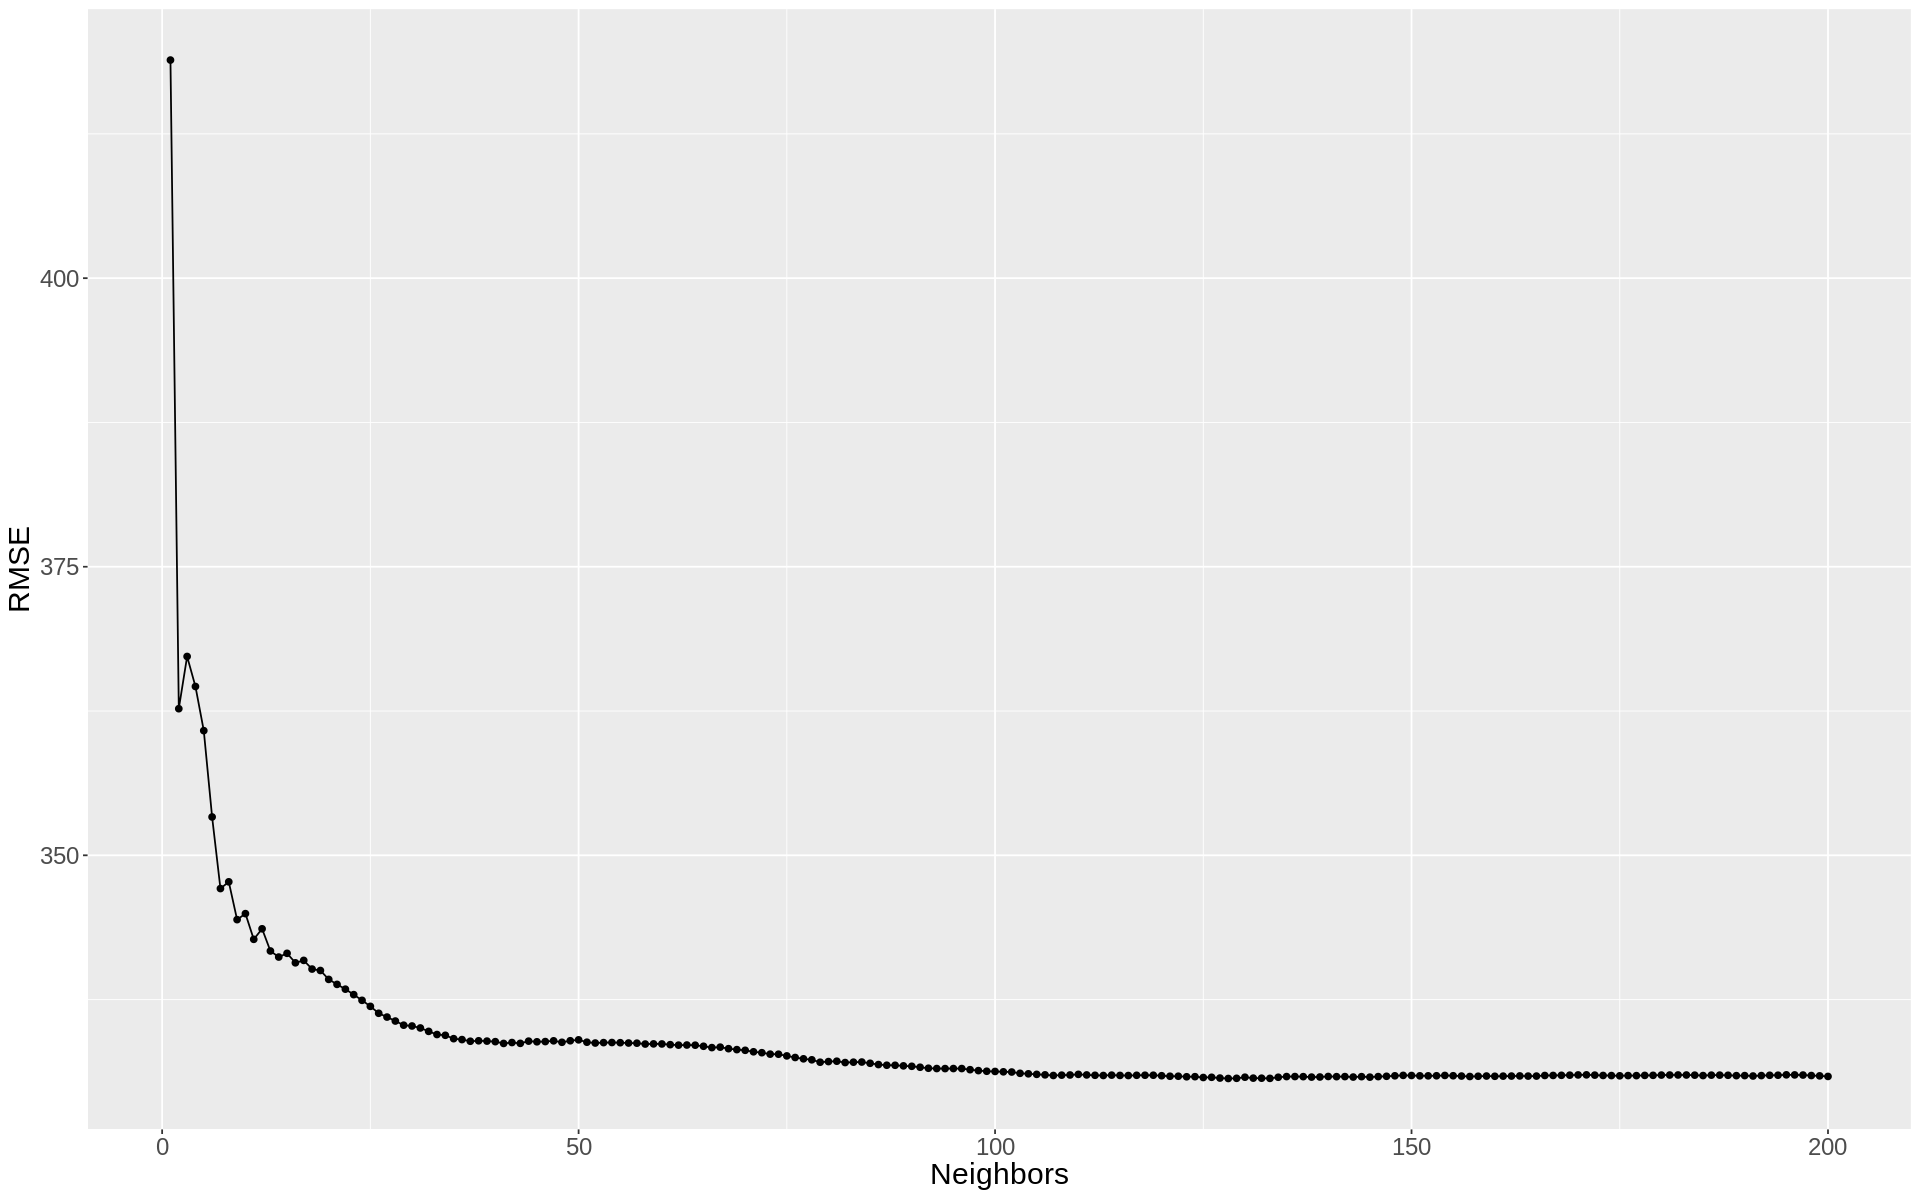

In [44]:
RMSPE2_plot <- ggplot(paris2_results, aes(x = neighbors, y = mean)) + 
    geom_line() +
    geom_point(alpha = 1.0) + #transparency
    xlab("Neighbors") +
    ylab("RMSE") +
    theme(text = element_text(size = 18)) 
RMSPE2_plot

In [45]:
# show only the row of minimum RMSPE
paris2_min <- paris2_results |>
  filter(mean == min(mean))

paris2_min 

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
128,rmse,standard,330.665,5,61.89383,Preprocessor1_Model128


Based on the graph and the summary table, the smallest RMSE (for testing data) for metro_dist (distance from the the metro stations) occurs when K = 128.

## Evaluation on the Test Set

In [46]:
k2min <- paris2_min  |> 
    pull(neighbors)

paris_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k2min) |>
  set_engine("kknn") |>
  set_mode("regression")

paris_fit <- workflow() |>
  add_recipe(paris_recipe) |>
  add_model(paris_spec) |>
  fit(data = paris_train)

paris_test2_summary <- paris_fit |>
  predict(paris_test) |>
  bind_cols(paris_test) |>
  metrics(truth = realSum, estimate = .pred) |>
  filter(.metric == 'rmse')

paris_test2_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,253.5067


The final model's test error as assessed by RMSPE 253.5067 EUR. Thus, one can expect the error in the prediction to be approximately 253.5067 EUR.

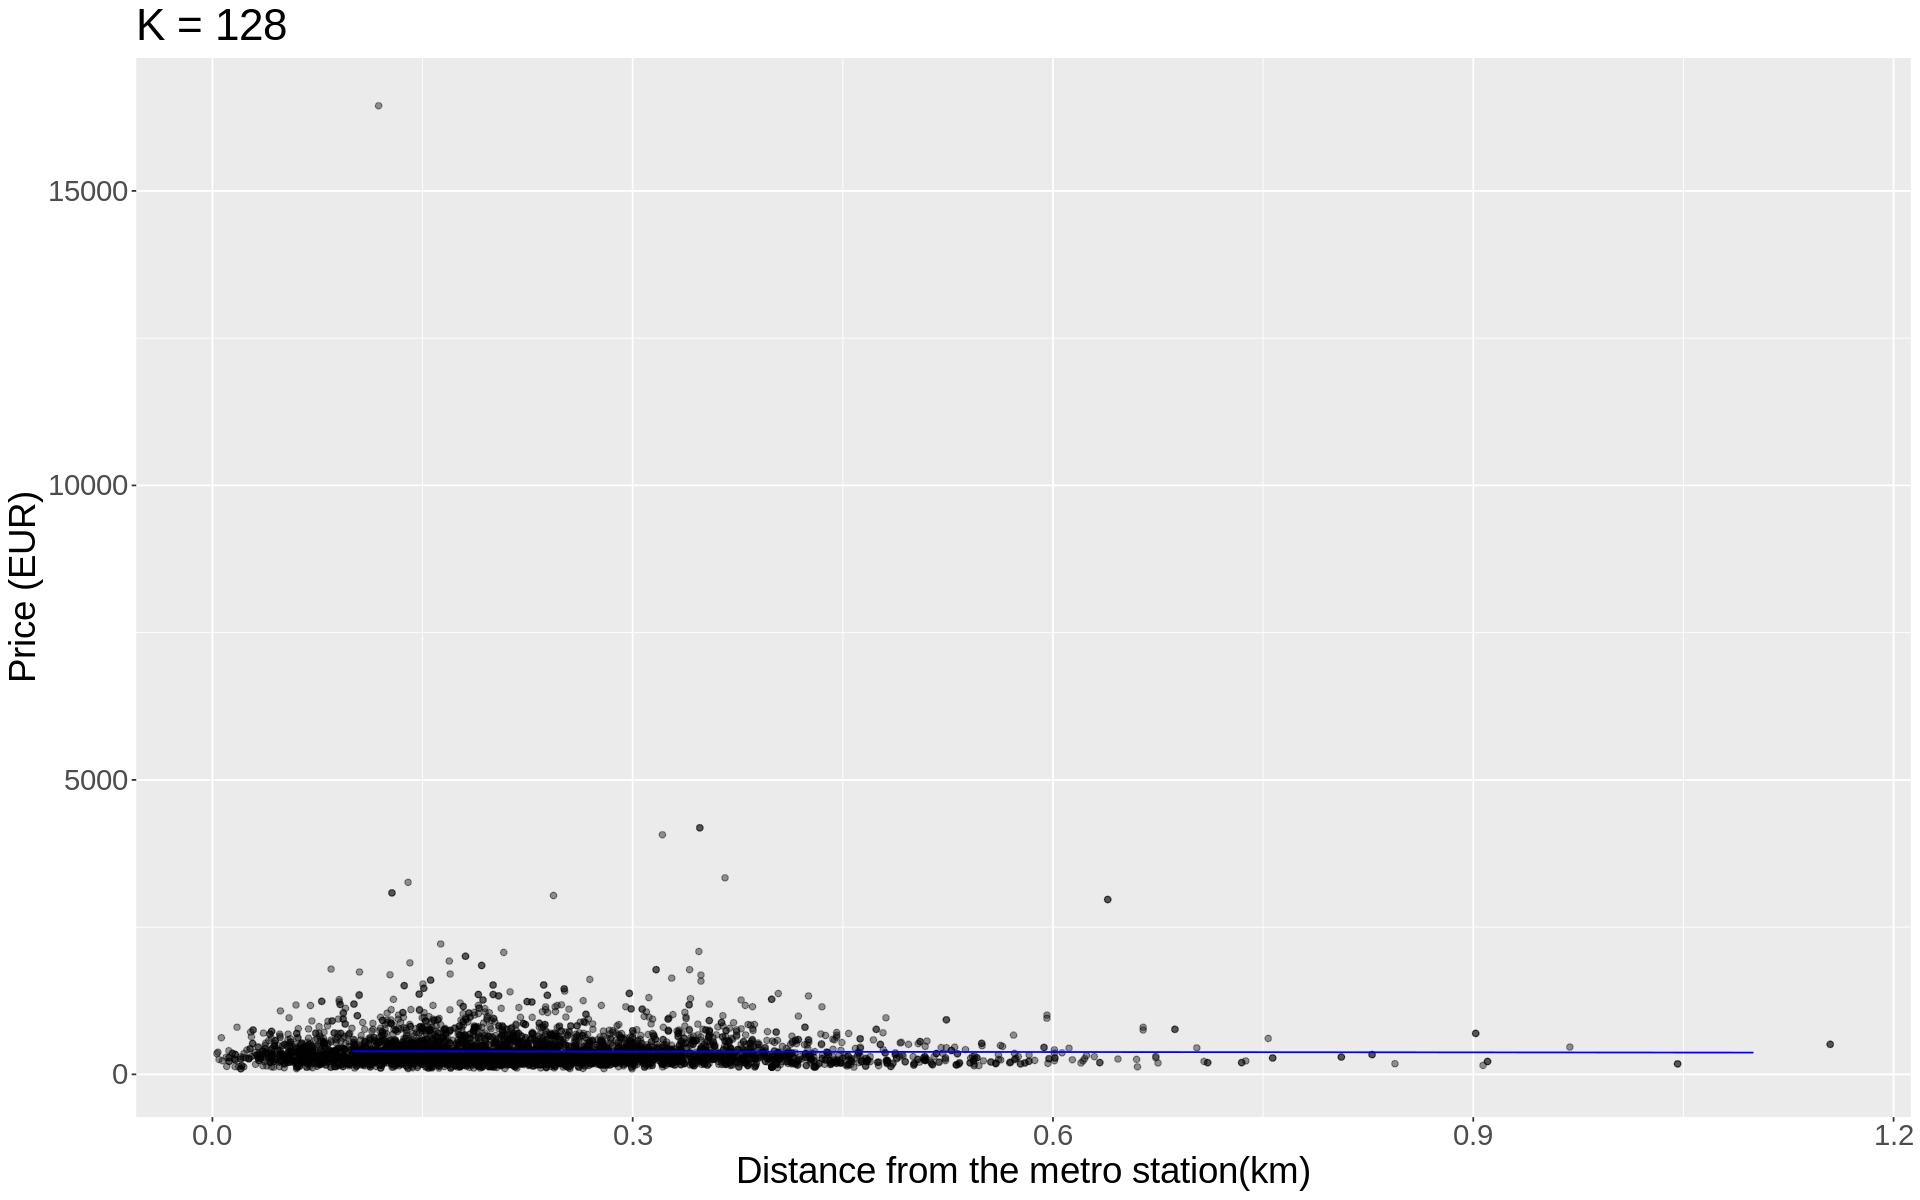

In [47]:
paris2_preds <- tibble(metro_dist = seq(from = 0.1, to = 2))

paris2_preds  <- paris_fit |>
  predict(paris2_preds) |>
  bind_cols(paris2_preds)

plot2_final <- ggplot(paris_train, aes(x = metro_dist, y = realSum)) +
  geom_point(alpha = 0.4) +
  geom_line(data = paris2_preds, 
            mapping = aes(x = metro_dist, y = .pred), 
            color = "blue") +
  xlab("Distance from the metro station(km)") +
  ylab("Price (EUR)") +
  ggtitle(paste0("K = ", k2min)) + 
  theme(text = element_text(size = 22))

plot2_final

It appears that the final model's test error as assessed by RMSPE is 253.5067 EUR, which is slightly higher than the previously reported value of 248.9917 EUR. This suggests that the final model's predictions may be off by approximately 25.35% of the true Airbnb price per day on new, unseen data. In comparison, the cross-validation RMSPE estimate of the tuned model is 330.665 EUR, which is higher than the final model's test error. This suggests that the final model may be performing better than the tuned model on new, unseen data.

## Discussion

Our study was initially intended perform Forward Selection to identify the most important predictors of Airbnb prices. However, problems were encountered in the process. Dataset we worked with is fairly very large, and the computational complexity of the Forward Selection method grows rapidly as the number of predictors increases. As a result, we had to explore alternative methods to identify the most important predictors in our analysis. We decided to use the RMSE plot and cross-validation to assess the relationship between Airbnb prices and distance from the city center or metro, as these were the only continuous variables included in our analysis. 

The RMSE plot was used to assess the relationship between distance from the city center or metro and Airbnb price. Based on the RMSE plot, it appears that there is no clear relationship between the distance from the city center or metro and Airbnb price in the dataset. This is further supported by the fact that the Forward Selection method was not feasible due to the size of the dataset in our case. These results suggest that location factors may not be strong predictors of Airbnb prices in this particular dataset. This finding is consistent with some previous research in the field of Airbnb pricing, which has found that other factors, such as property characteristics, amenities, and demand patterns, may be more important in determining Airbnb prices than location alone.


A study by Guttentag (2015) found that the quality of property descriptions, photos, and reviews were strong predictors of Airbnb prices, while location was a weaker predictor. Another study by Chen et al. (2017) found that room type, number of reviews, and availability were important predictors of Airbnb prices, while distance from the city center was not a significant predictor. Findings suggest that Airbnb pricing is a complex phenomenon that may be influenced by a variety of factors beyond just location. Therefore, it may be useful to consider a wider range of variables in future analyses of Airbnb pricing, such as property characteristics, amenities, demand patterns, and host reputation.
Overall, our results suggest that distance from the city center or metro may not be reliable predictors of Airbnb prices in this dataset, and that other factors may be more important for understanding pricing patterns in the Airbnb market. Further research is needed to explore these factors in more detail and to develop more accurate models for predicting Airbnb prices.


#### References:
1. https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities?select=paris_weekends.csv 
2. https://www.sciencedirect.com/science/article/pii/S0261517718300785
3. https://www.sciencedirect.com/science/article/pii/S1877916621000424 
4. https://www.tandfonline.com/doi/abs/10.1080/13683500.2013.827159
5. https://www.researchgate.net/publication/315553108_Consumer_Valuation_of_Airbnb_Listings_A_Hedonic_Pricing_Approach 